In [1]:
import numpy as np 
import matplotlib.pyplot as plt

nsol = 555
ncat = 1
nan = 1
catl = ["Li", "Na", "K", "Rb", "Cs"]
# catl = ["Li"]
anl = ["Cl"]

watermodel = 'SPCE'
ionmodel = 'Dang'

temp = 300
pressure = 1.0
simtime = 100

efields = [0.0, 0.1, 0.2, 0.5, 1.0]
# make a list of 5 distinct colors
colors = ['black', 'red', 'green', 'blue', 'gold']

mpath = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/"

<>:70: SyntaxWarning: invalid escape sequence '\m'
<>:70: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2022025/2201762209.py:70: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


Li: 14.09 at 1.96
Li: 14.14 at 1.96
Li: 14.15 at 1.96
Li: 14.12 at 1.96
Li: 13.91 at 1.96


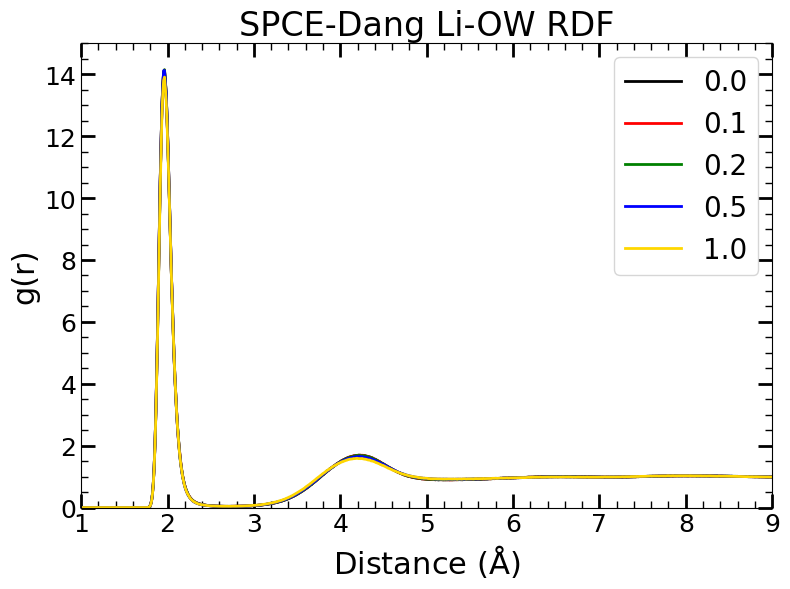

Na: 7.27 at 2.44
Na: 7.24 at 2.44
Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/rdf-OW.xvg
Na: 7.26 at 2.44
Na: 7.12 at 2.46
Na: 6.93 at 2.44


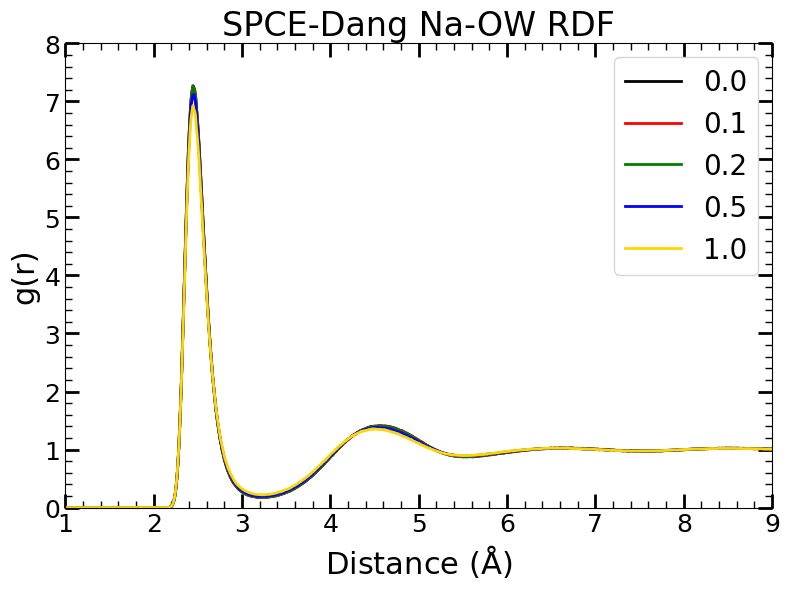

K: 4.33 at 2.82
Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.1V_13/rdf-OW.xvg
K: 4.33 at 2.81
K: 4.32 at 2.81
K: 4.25 at 2.83
K: 4.13 at 2.82


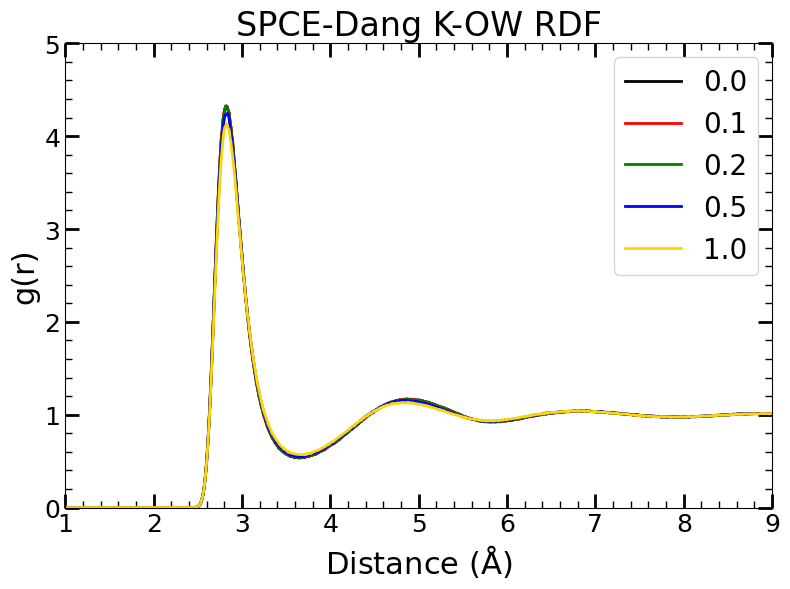

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.0V_6/rdf-OW.xvg
Rb: 3.86 at 2.94
Rb: 3.85 at 2.92
Rb: 3.86 at 2.94
Rb: 3.79 at 2.94
Rb: 3.69 at 2.92


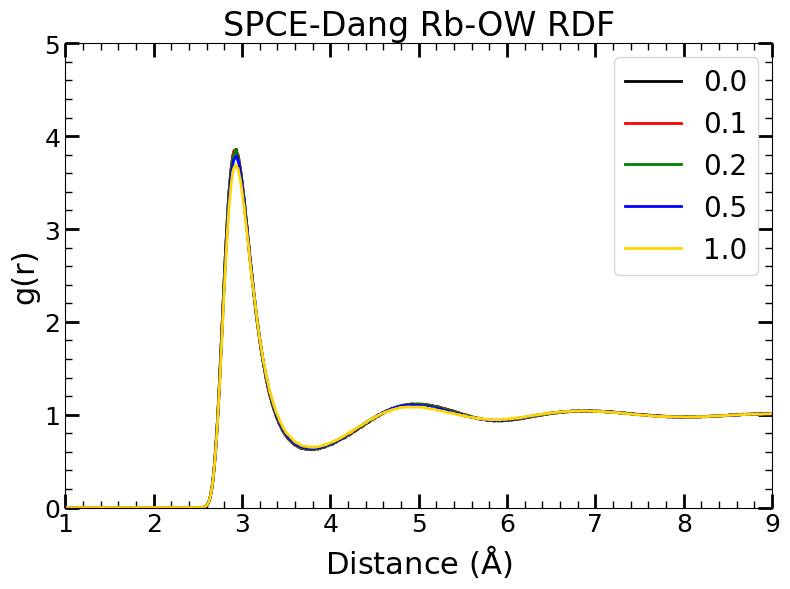

Cs: 3.19 at 3.12
Cs: 3.19 at 3.11
Cs: 3.19 at 3.10
Cs: 3.15 at 3.11
Cs: 3.09 at 3.11


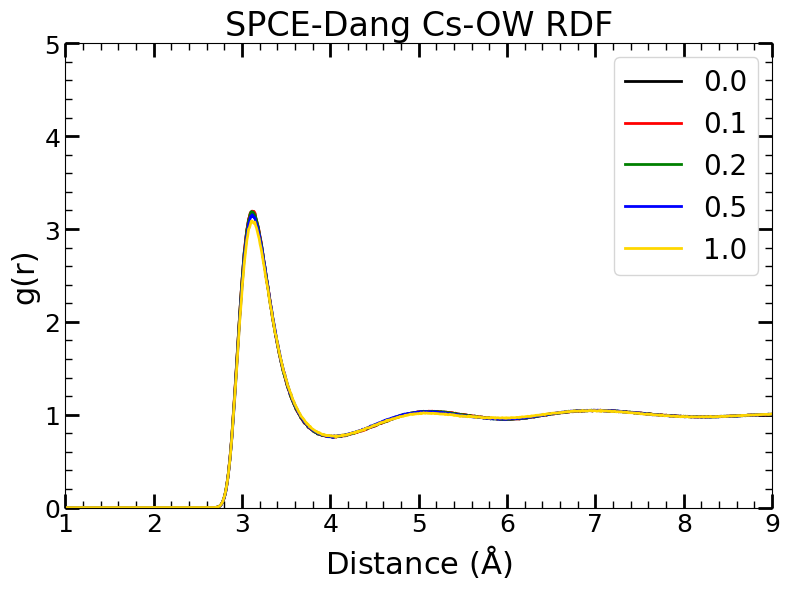

Cl: 3.79 at 3.23
Cl: 3.78 at 3.23
Cl: 3.79 at 3.23
Cl: 3.75 at 3.23
Cl: 3.64 at 3.23


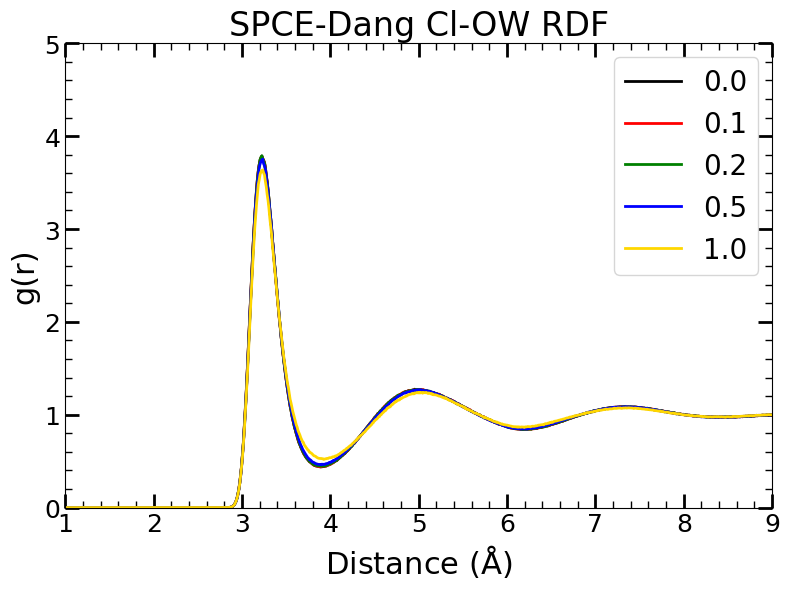

In [3]:
plt.style.use('rcParams.mplstyle')

for ion in catl + anl:
    fig, ax = plt.subplots(figsize=(8, 6))
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation, anion]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-OW.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-OW.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
            if len(all[ion]) > 0:
                ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                print(f"{ion}: {max(avg[ion]):.2f} at {x[np.argmax(avg[ion])]:.2f}")
        ax.legend()
        ax.set_xlim(1, 9)
        if ion == "Li":
            ax.set_ylim(0, 15)
        elif ion == "Na":
            ax.set_ylim(0, 8)
        elif ion == "K":
            ax.set_ylim(0, 5)
        elif ion == "Rb":
            ax.set_ylim(0, 5)
        elif ion == "Cs":
            ax.set_ylim(0, 5)
        elif ion == "Cl":
            ax.set_ylim(0, 5)


        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("g(r)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-OW RDF")
    plt.tight_layout()
    plt.show()




<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2022025/1010400533.py:61: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


Li: 3.77 at 2.65
Li: 3.76 at 2.65
Li: 3.75 at 2.65
Li: 3.71 at 2.65
Li: 3.55 at 2.65


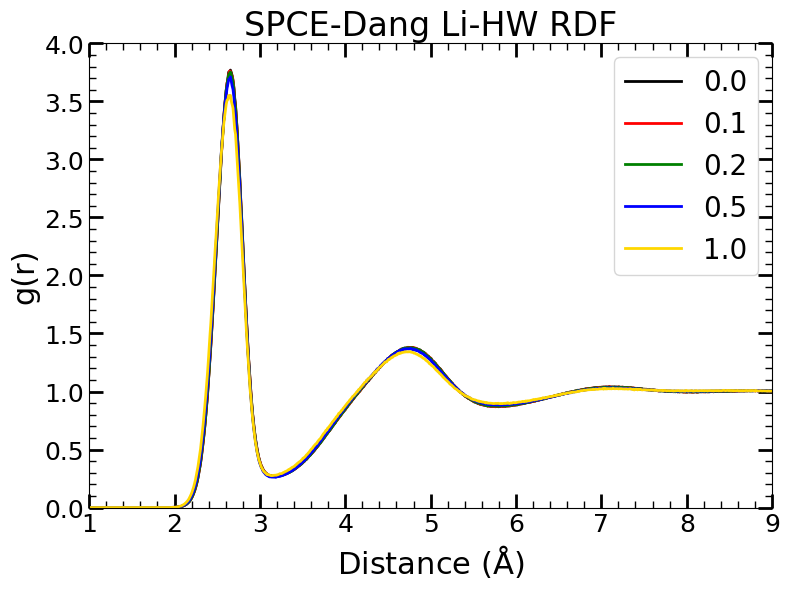

Na: 2.84 at 3.08
Na: 2.83 at 3.08
Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/rdf-HW.xvg
Na: 2.82 at 3.08
Na: 2.78 at 3.08
Na: 2.67 at 3.06


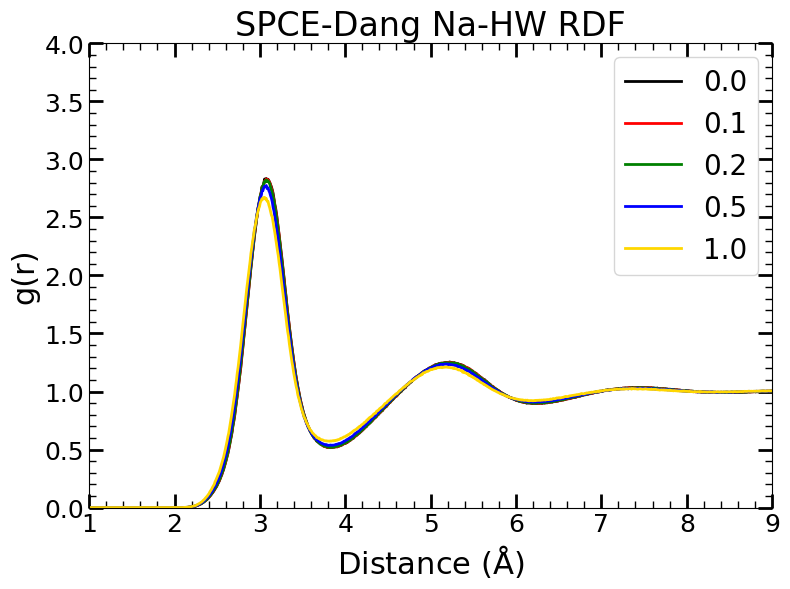

K: 2.19 at 3.44
Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.1V_13/rdf-HW.xvg
K: 2.19 at 3.40
K: 2.18 at 3.40
K: 2.14 at 3.40
K: 2.07 at 3.38


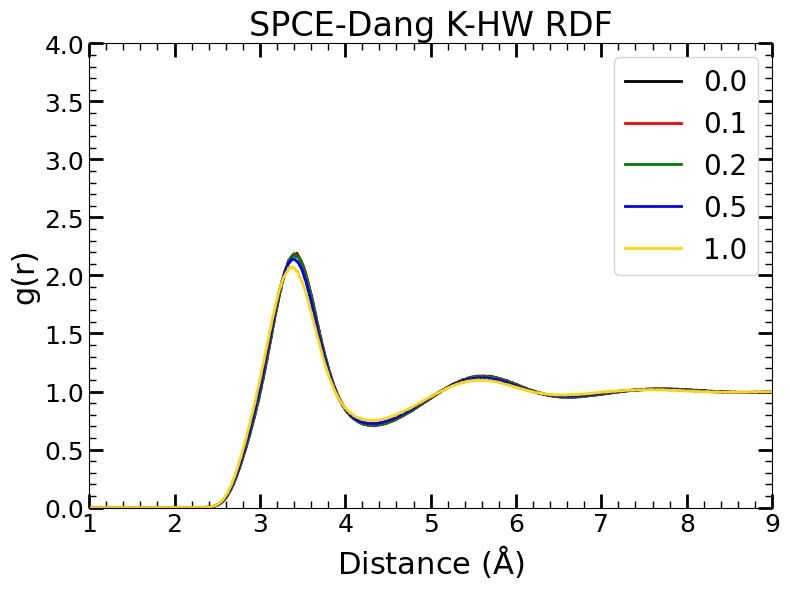

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.0V_6/rdf-HW.xvg
Rb: 2.07 at 3.48
Rb: 2.07 at 3.50
Rb: 2.06 at 3.50
Rb: 2.03 at 3.48
Rb: 1.97 at 3.46


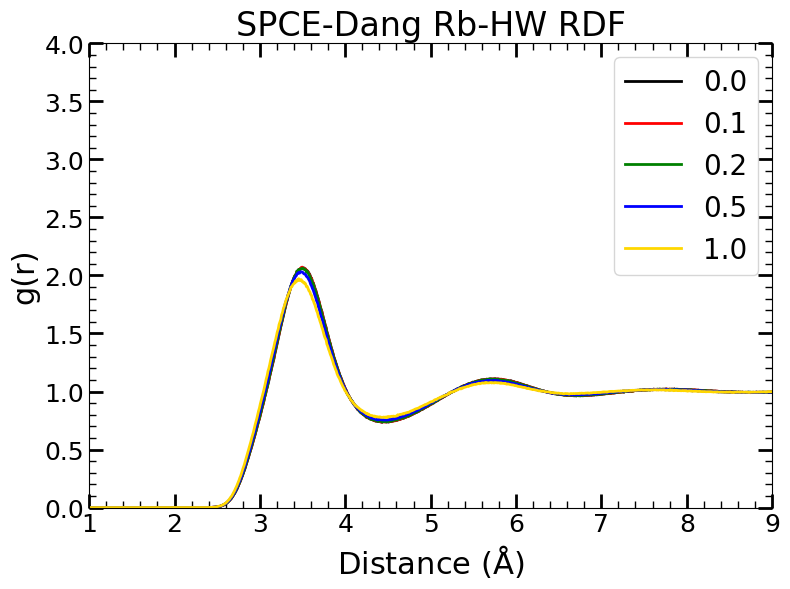

Cs: 1.90 at 3.65
Cs: 1.90 at 3.62
Cs: 1.90 at 3.65
Cs: 1.87 at 3.62
Cs: 1.81 at 3.60


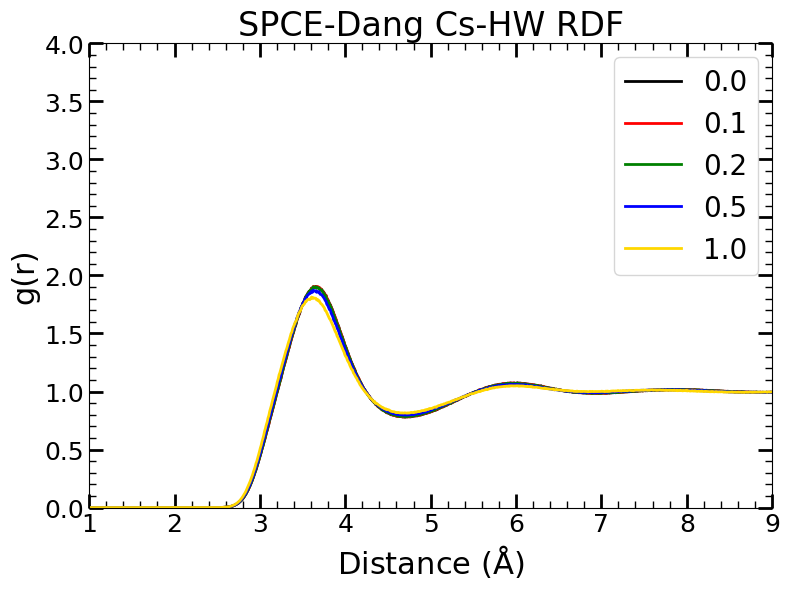

Cl: 3.50 at 2.25
Cl: 3.49 at 2.25
Cl: 3.50 at 2.25
Cl: 3.47 at 2.25
Cl: 3.35 at 2.25


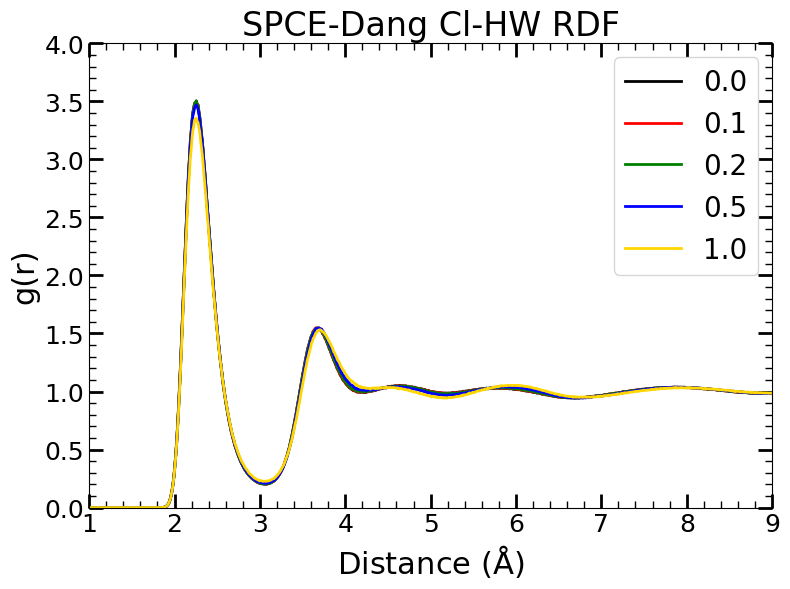

In [4]:
plt.style.use('rcParams.mplstyle')

for ion in catl + anl:
    fig, ax = plt.subplots(figsize=(8, 6))
    x = []
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation, anion]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-HW.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-HW.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
            if len(all[ion]) > 0:
                ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                print(f"{ion}: {max(avg[ion]):.2f} at {x[np.argmax(avg[ion])]:.2f}")
        ax.legend()
        ax.set_xlim(1, 9)
        ax.set_ylim(0, 4)
        # if ion == "Li":
        #     ax.set_xlim(1.8, 1.9)
        #     ax.set_ylim(13.5, 14.5)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("g(r)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-HW RDF")
    plt.tight_layout()
    plt.show()




<>:63: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2022025/65381509.py:63: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")


Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Li/run_100ns_1.0bar_300K_0.2V_5/rdf-Li-Cl.xvg


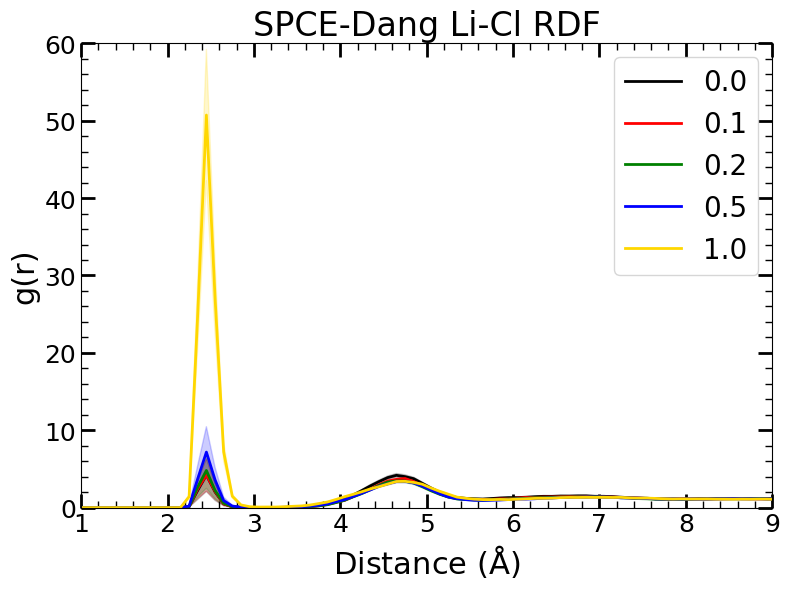

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/rdf-Na-Cl.xvg


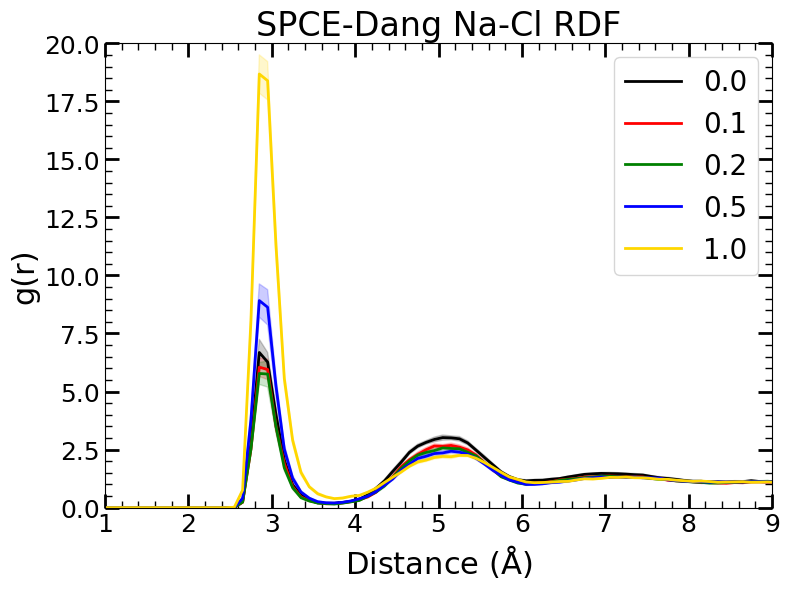

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.1V_13/rdf-K-Cl.xvg


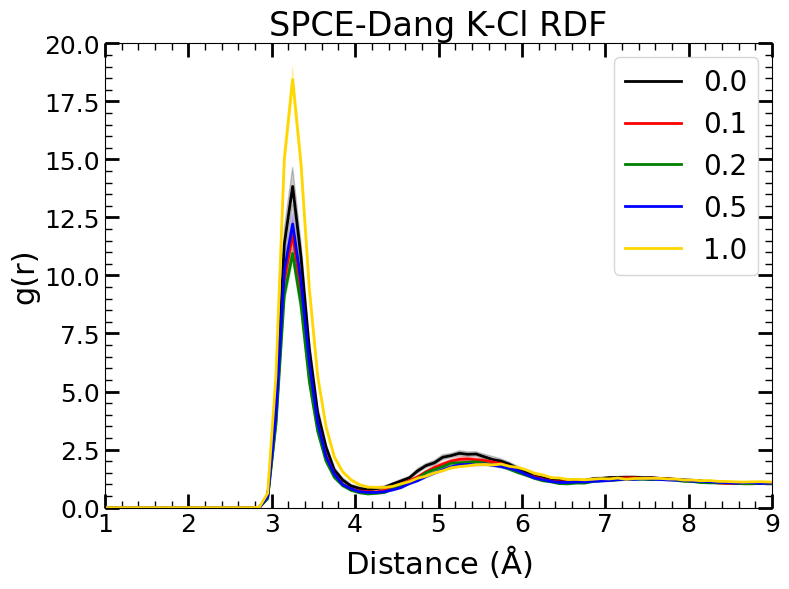

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.0V_6/rdf-Rb-Cl.xvg


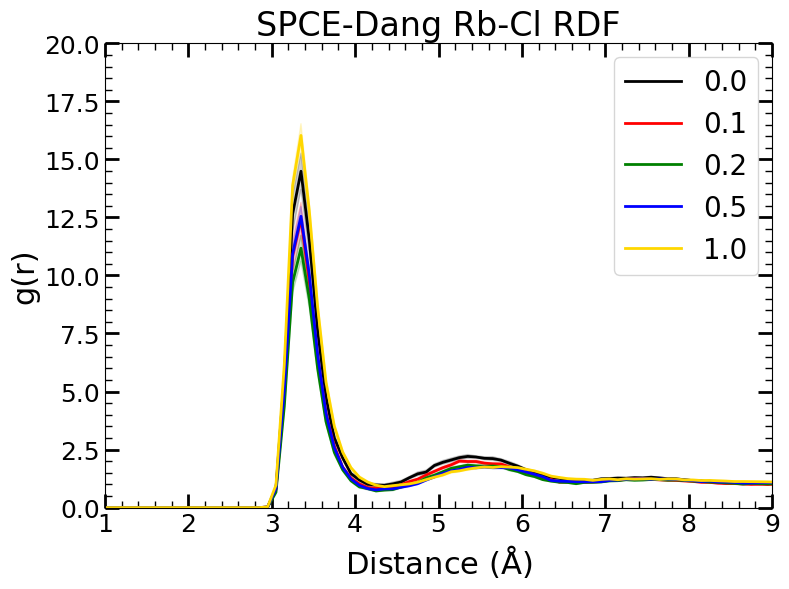

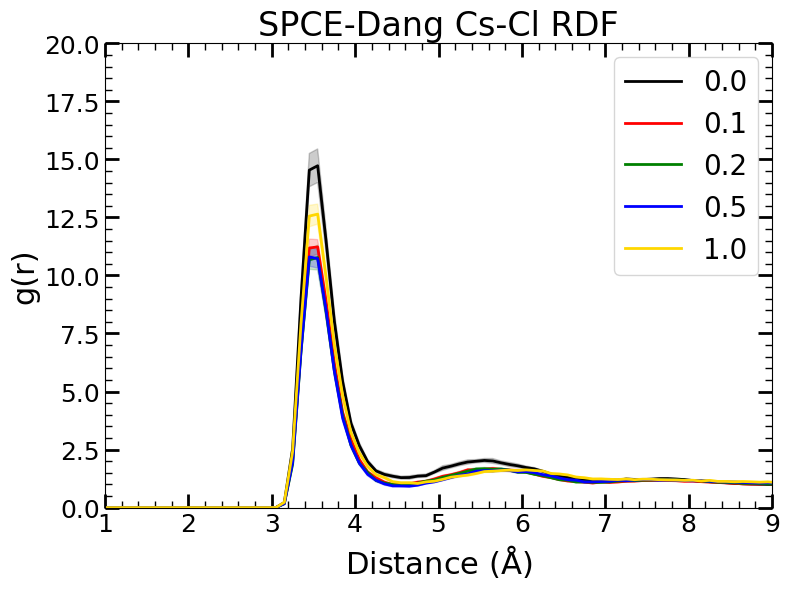

In [5]:
plt.style.use('rcParams.mplstyle')

for ion in catl:
    fig, ax = plt.subplots(figsize=(8, 6))
    cation = ion
    anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-{cation}-{anion}.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-{cation}-{anion}.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
                err[ion] = 1.96*np.std(all[ion], axis=0)/np.sqrt(len(all[ion]))
                ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                ax.fill_between(x, avg[ion]-err[ion], avg[ion]+err[ion], alpha=0.2, color=colors[efields.index(efield)])
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
        ax.legend()
        ax.set_xlim(1, 9)
        if ion == "Li":
            ax.set_ylim(0, 60)
        elif ion == "Na":
            ax.set_ylim(0, 20)
        elif ion == "K":
            ax.set_ylim(0, 20)
        elif ion == "Rb":
            ax.set_ylim(0, 20)
        elif ion == "Cs":
            ax.set_ylim(0, 20)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("g(r)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-{anl[0]} RDF")
    plt.tight_layout()
    plt.show()




<>:61: SyntaxWarning: invalid escape sequence '\m'
<>:61: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2022025/1394539936.py:61: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Distance ($\mathrm{\AA}$)")
/tmp/ipykernel_2022025/1394539936.py:45: RuntimeWarning: divide by zero encountered in log
  free = -np.log(avg[ion])
/tmp/ipykernel_2022025/1394539936.py:46: RuntimeWarning: invalid value encountered in divide
  free_err = err[ion]/avg[ion]


Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Li/run_100ns_1.0bar_300K_0.2V_5/rdf-Li-Cl.xvg


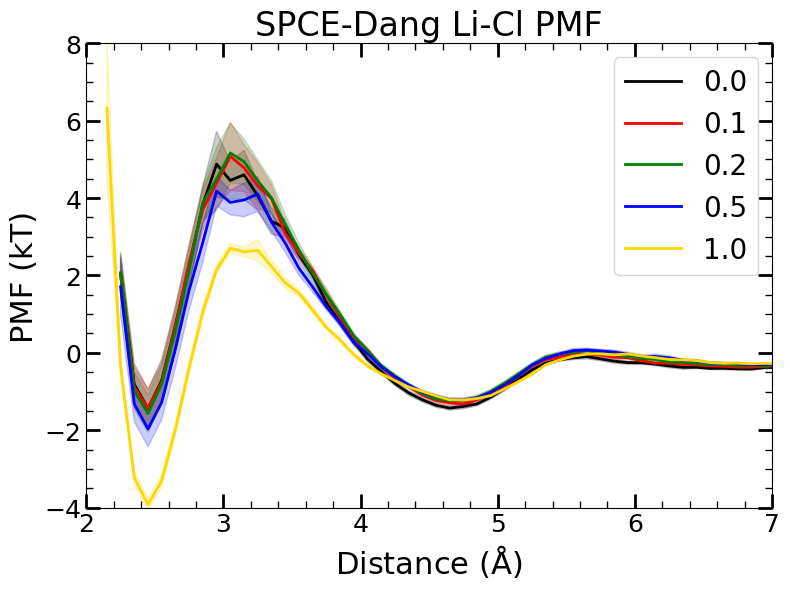

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/rdf-Na-Cl.xvg


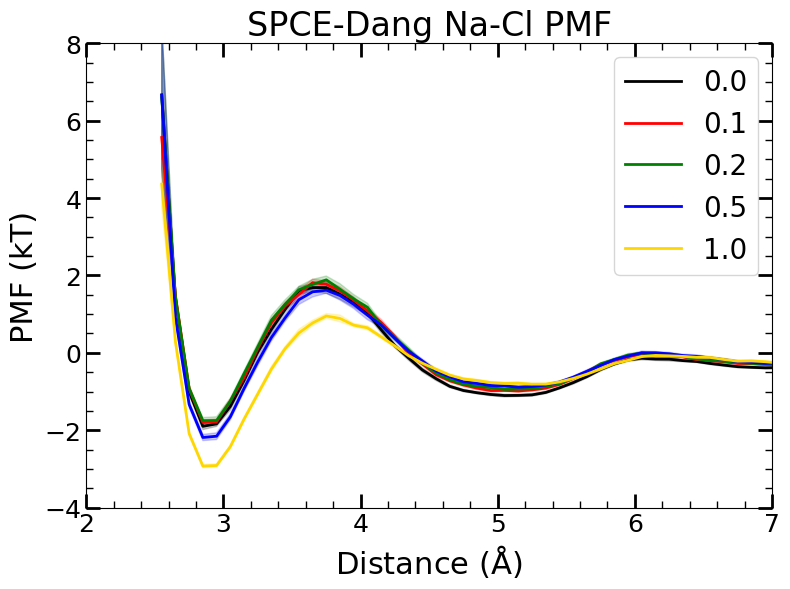

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.1V_13/rdf-K-Cl.xvg


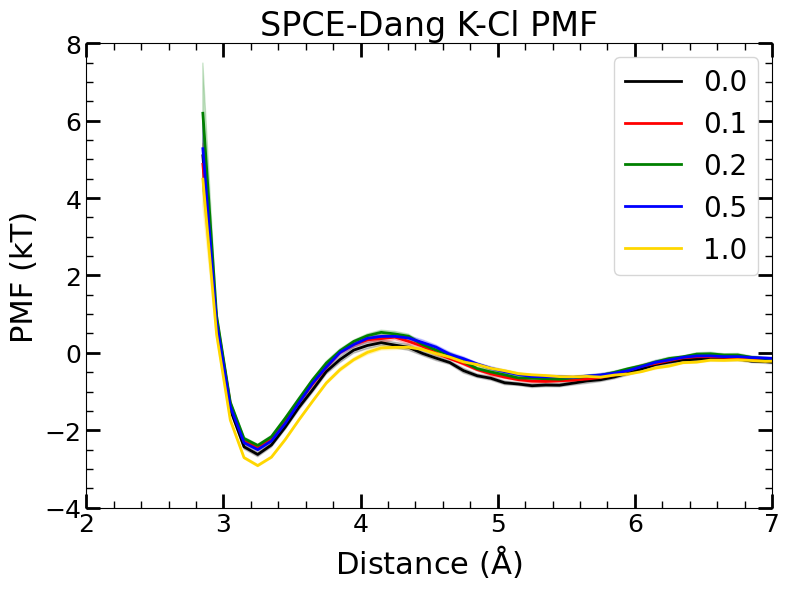

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.0V_6/rdf-Rb-Cl.xvg


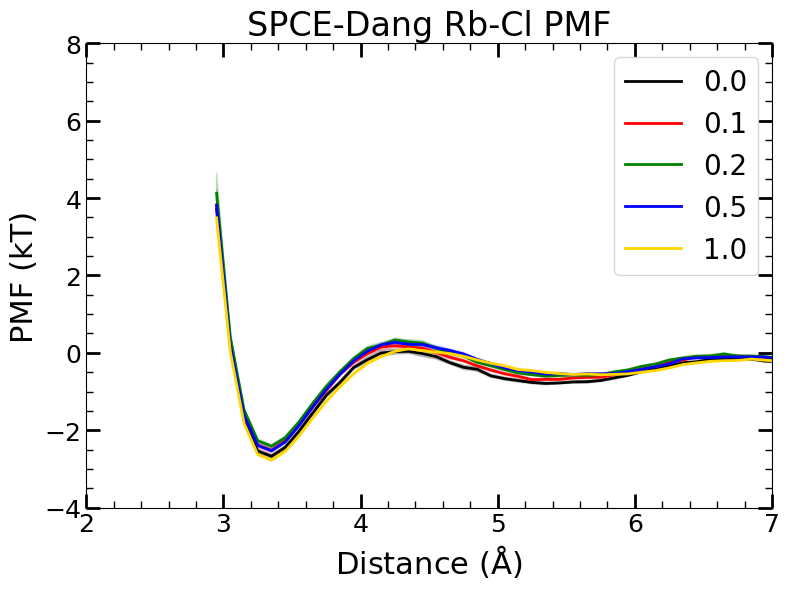

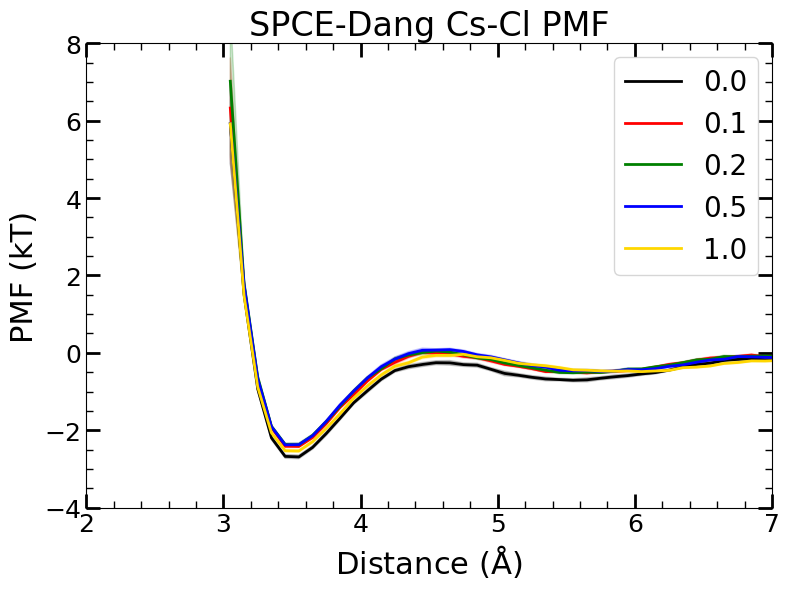

In [6]:
plt.style.use('rcParams.mplstyle')

for ion in catl:
    fig, ax = plt.subplots(figsize=(8, 6))
    cation = ion
    anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'rdf-{cation}-{anion}.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'rdf-{cation}-{anion}.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
                err[ion] = 1.96*np.std(all[ion], axis=0)/np.sqrt(len(all[ion]))
                free = -np.log(avg[ion])
                free_err = err[ion]/avg[ion]
                ax.plot(x, free, label=f"{efield}", color=colors[efields.index(efield)])
                ax.fill_between(x, free-free_err, free+free_err, alpha=0.2, color=colors[efields.index(efield)])
                # ax.plot(x, avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
                # ax.fill_between(x, avg[ion]-err[ion], avg[ion]+err[ion], alpha=0.2, color=colors[efields.index(efield)])
            elif len(all[anl[0]]) == 1:
                avg[ion] = all[ion][0]
        ax.legend()
        ax.set_xlim(2, 7)
        ax.set_ylim(-4, 8)
        # if ion == "Li":
        #     ax.set_xlim(1.8, 1.9)
        #     ax.set_ylim(13.5, 14.5)

        # ax.set_ylim(0, 15)
        ax.set_xlabel("Distance ($\mathrm{\AA}$)")
        ax.set_ylabel("PMF (kT)")
        ax.set_title(f"{watermodel}-{ionmodel} {ion}-{anl[0]} PMF")
    plt.tight_layout()
    plt.show()




<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2022025/3408998071.py:80: SyntaxWarning: invalid escape sequence '\c'
  secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
/tmp/ipykernel_2022025/3408998071.py:80: SyntaxWarning: invalid escape sequence '\c'
  secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
/tmp/ipykernel_2022025/3408998071.py:80: SyntaxWarning: 

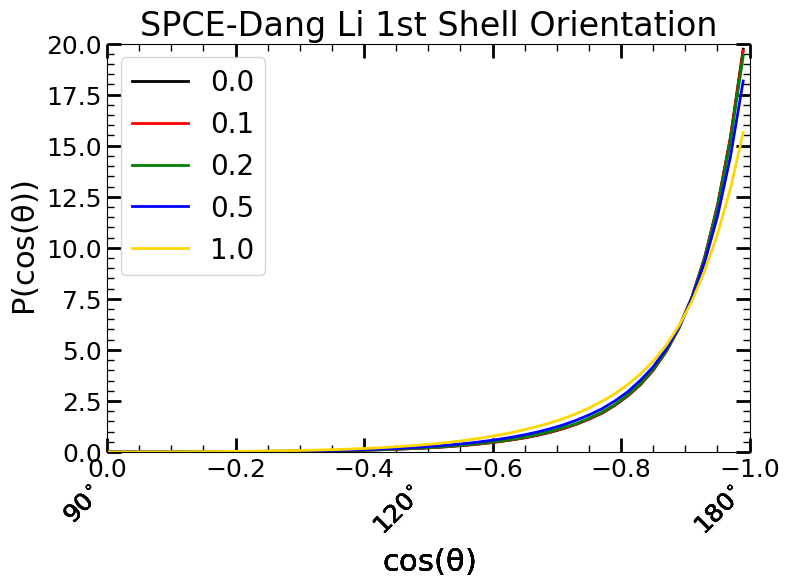

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/solvation_orientation.xvg


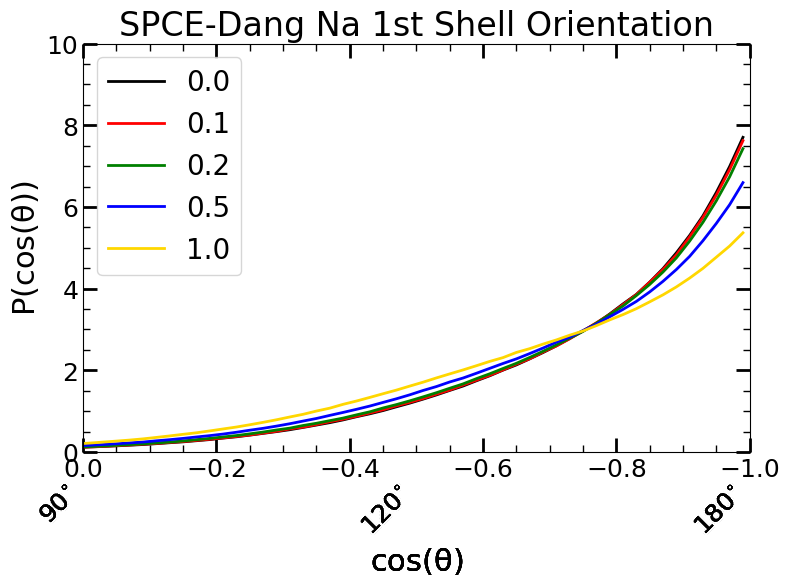

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.1V_13/solvation_orientation.xvg


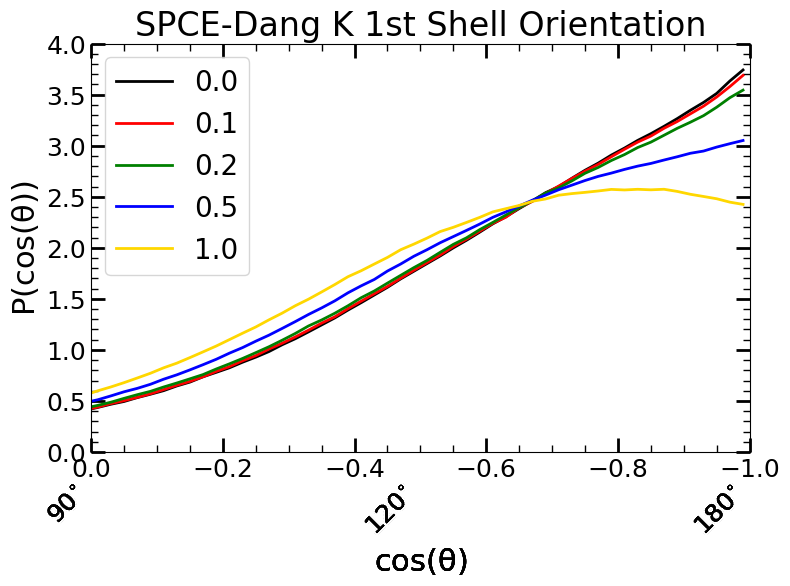

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.0V_6/solvation_orientation.xvg


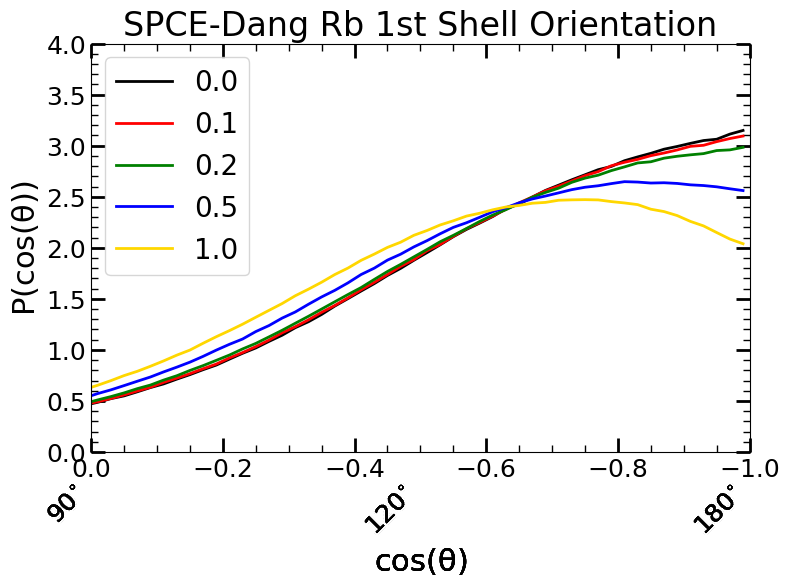

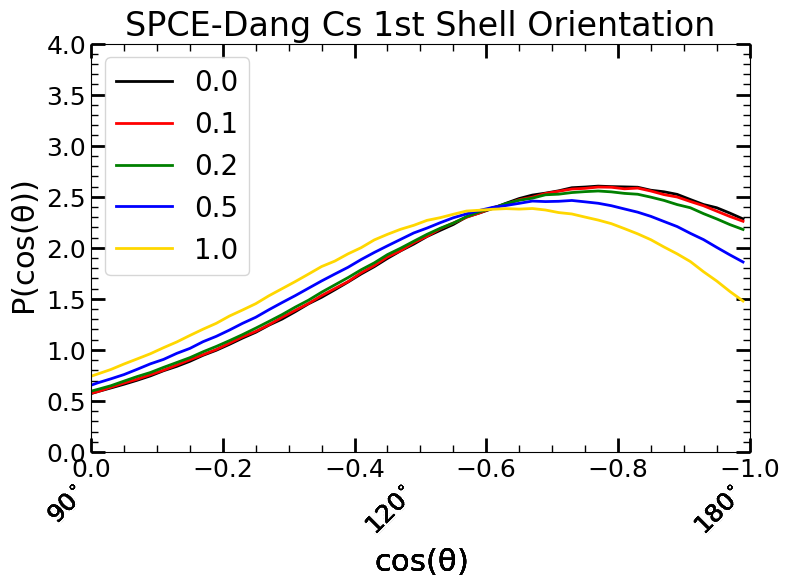

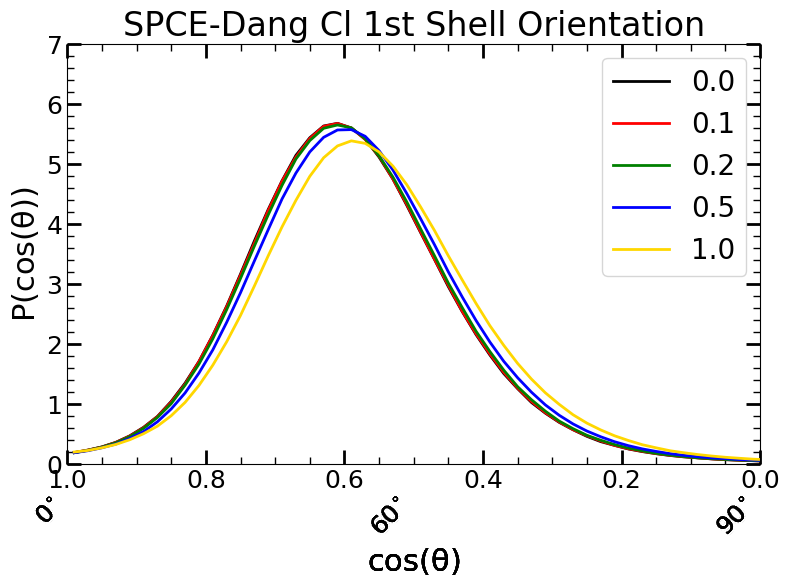

In [7]:
plt.style.use('rcParams.mplstyle')

for ion in catl + anl:
    fig, ax = plt.subplots(figsize=(8, 6))
    if ion == anl[0]:
        cation = catl[0]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        all = dict()
        avg = dict()
        err = dict()
        all[ion] = []
        avg[ion] = []
        err[ion] = []
        x = []
        for i in range(1, 17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{i}/"
            columns = ['x', cation, anion]
            y = dict()
            for col in columns:
                y[col] = []
            try:
                with open(simpath+f'solvation_orientation.xvg') as f:
                    lines = f.readlines()
                    for col in columns:
                        for line in lines:
                            if line[0] == '#' or line[0] == '@':
                                continue
                            y[col].append(float(line.split()[columns.index(col)]))
                    for col in columns:
                        y[col] = np.array(y[col])
                    all[ion].append(y[ion])
                x = y['x']
            except:
                print(f"Could not open {simpath+f'solvation_orientation.xvg'}")
                continue
        

        # ax.plot(y['x'], y[catl[0]], label=i)#label=f"{catl[0]}")
        # ax.plot(y['x'], y[anl[0]], label=f"{anl[0]}")

        if len(x) > 0:
            if len(all[ion]) > 1:
                avg[ion] = np.mean(all[ion], axis=0)
            elif len(all[ion]) == 1:
                avg[ion] = all[ion][0]
            if len(all[ion]) > 0:
                ax.plot(x, 2*avg[ion], label=f"{efield}", color=colors[efields.index(efield)])
        ax.legend()
        if ion in catl:
            ax.set_xlim(-1, 0)
        else:
            ax.set_xlim(0, 1) 
        if ion == "Li":
            ax.set_ylim(0, 20)
        elif ion == "Na":
            ax.set_ylim(0, 10)
        elif ion == "K":
            ax.set_ylim(0, 4)
        elif ion == "Rb":
            ax.set_ylim(0, 4)
        elif ion == "Cs":
            ax.set_ylim(0, 4)
        elif ion == "Cl":
            ax.set_ylim(0, 7)
        # ax.set_ylim(0, 20)
        # ax.set_yticks([0, 5, 10, 15, 20])

        def arccos_transform(x):
            return np.arccos(x)*180/np.pi

        def cos_transform(x):
            return np.cos(x*np.pi/180)

        secax = ax.secondary_xaxis(-0.06, functions=(arccos_transform, cos_transform))
        secax.set_xticks([0, 60, 90, 120, 180])
        secax.set_xticklabels(['0$^{\circ}$', '60$^{\circ}$', '90$^{\circ}$', '120$^{\circ}$', '180$^{\circ}$'], rotation=45, ha='right')
        secax.spines['bottom'].set_visible(False)
        secax.tick_params(axis='x', which='both', length=0)


        # ax2 = ax.twiny()
        # ax2.set_xticks([np.arccos(-1)*180/np.pi, np.arccos(-np.sqrt(3/4))*180/np.pi, np.arccos(-0.5)*180/np.pi, np.arccos(0)*180/np.pi, np.arccos(0.5)*180/np.pi, np.arccos(np.sqrt(3/4))*180/np.pi, np.arccos(1)*180/np.pi])

        secax.set_xlabel(r'cos($\mathrm{\theta}$)')
        ax.set_ylabel(r'P(cos($\mathrm{\theta}$))')
        # ax.set_xlim(0, 180)
        # ax.axvline(x=np.cos(104.52/2*np.pi/180), color='k', linestyle='--', linewidth=1)
        ax.set_title(f'{watermodel}-{ionmodel} {ion} 1st Shell Orientation')
        ax.legend()
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()




16


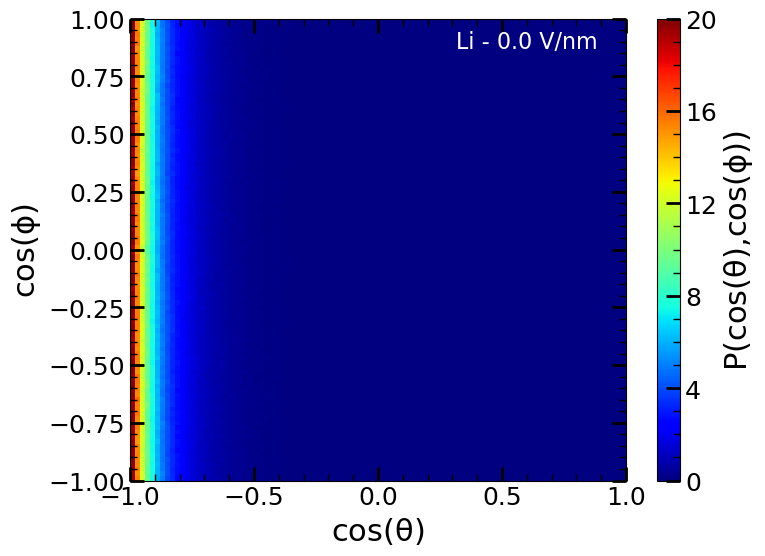

16


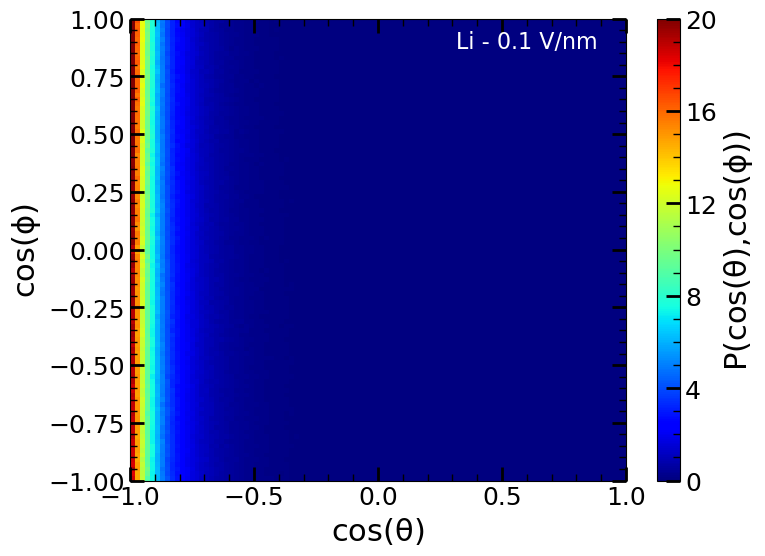

16


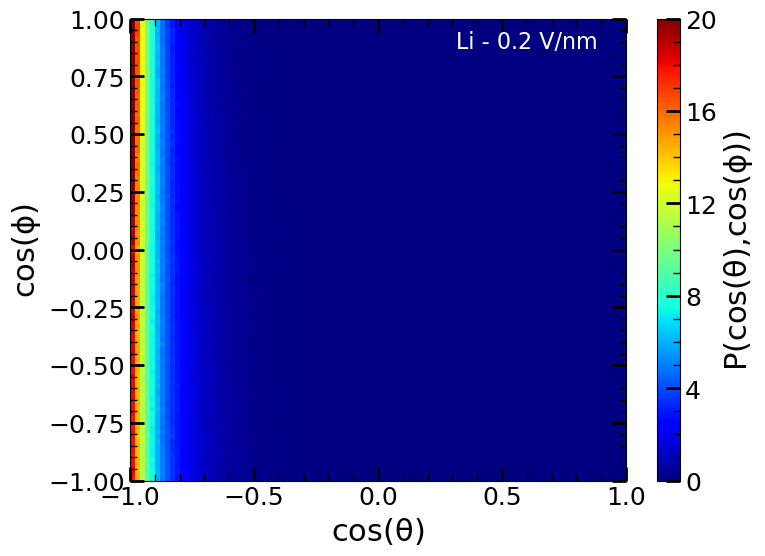

16


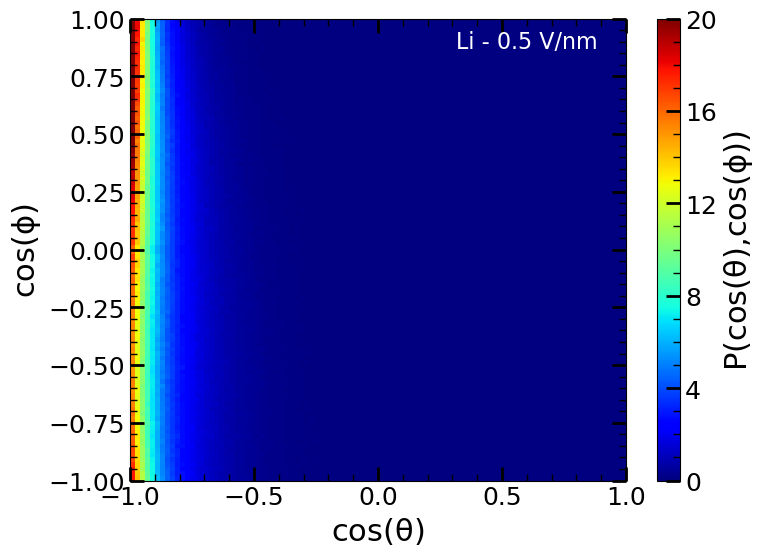

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Li/run_100ns_1.0bar_300K_1.0V_12/solvation_fieldLi.xvg
15


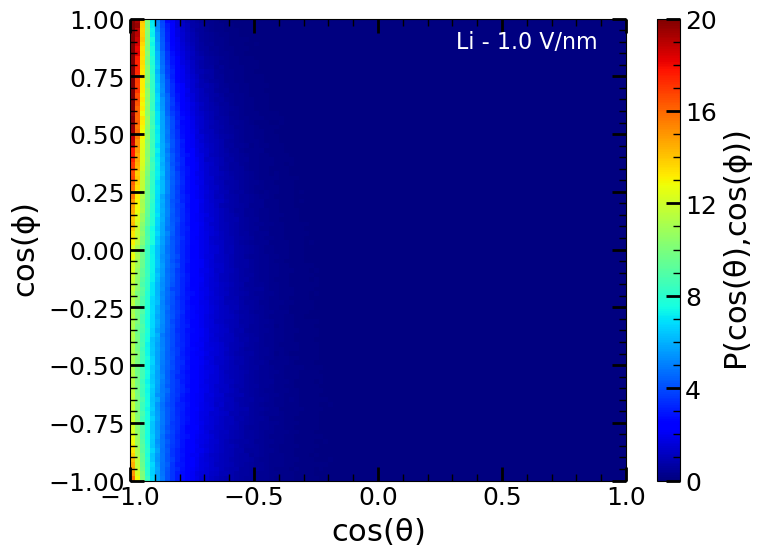

16


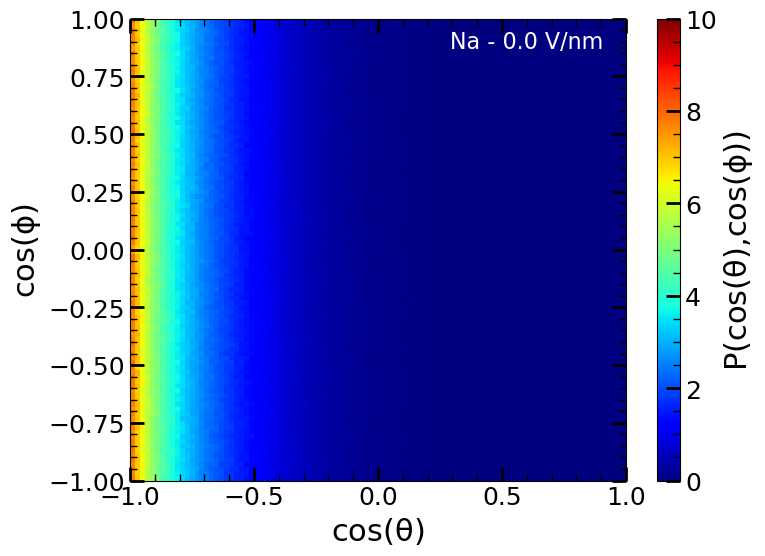

16


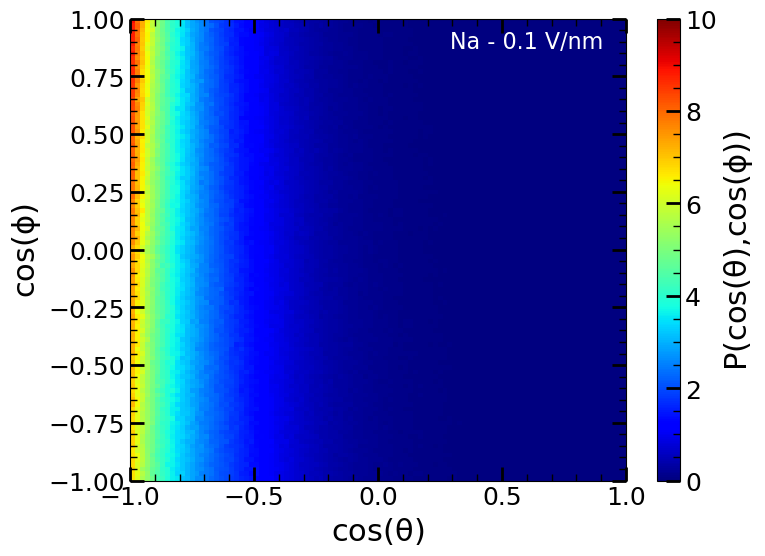

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/solvation_fieldNa.xvg
15


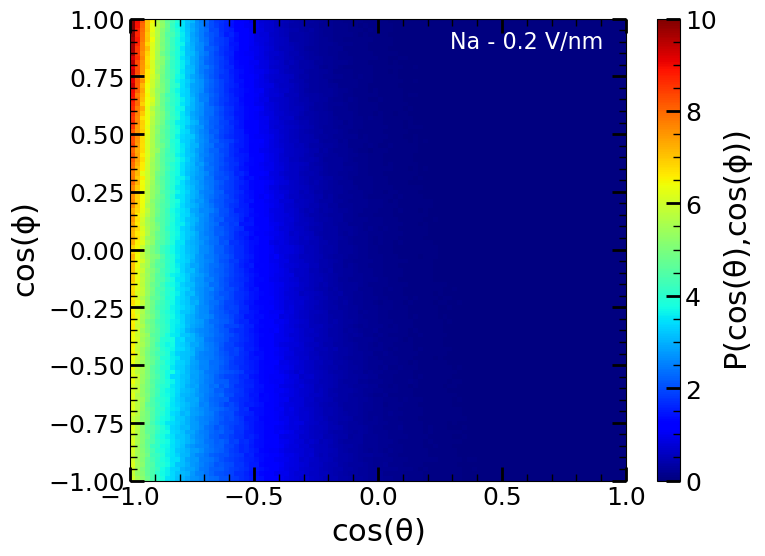

16


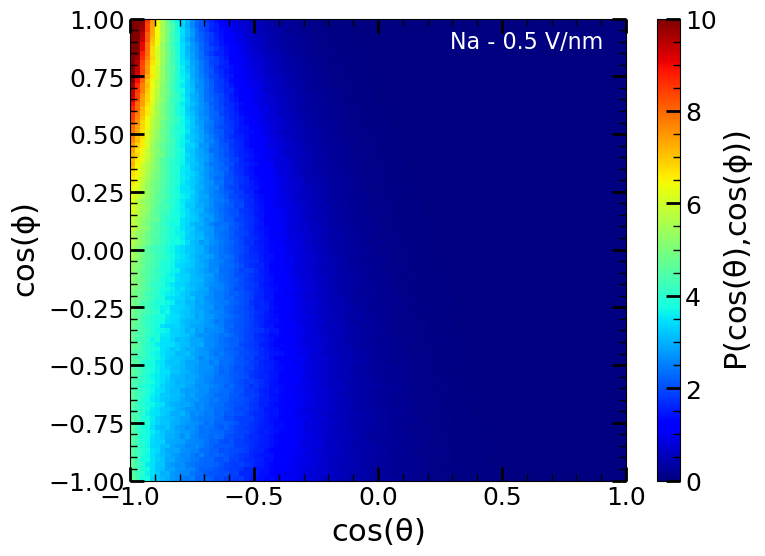

16


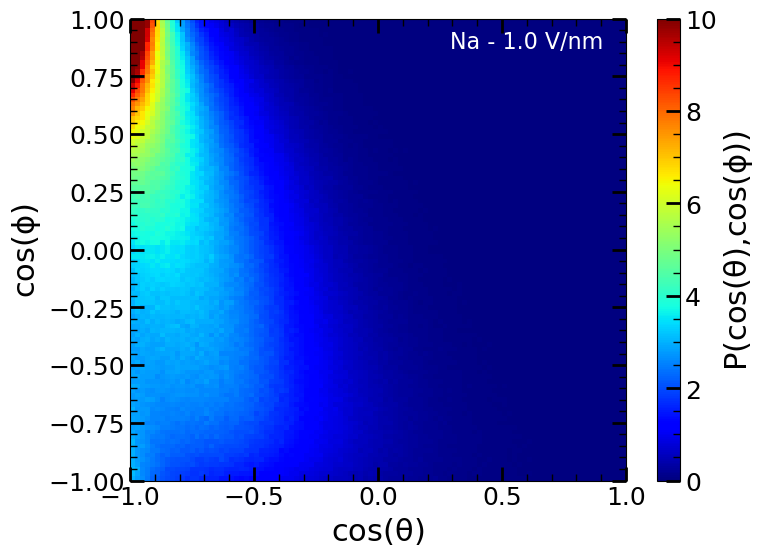

16


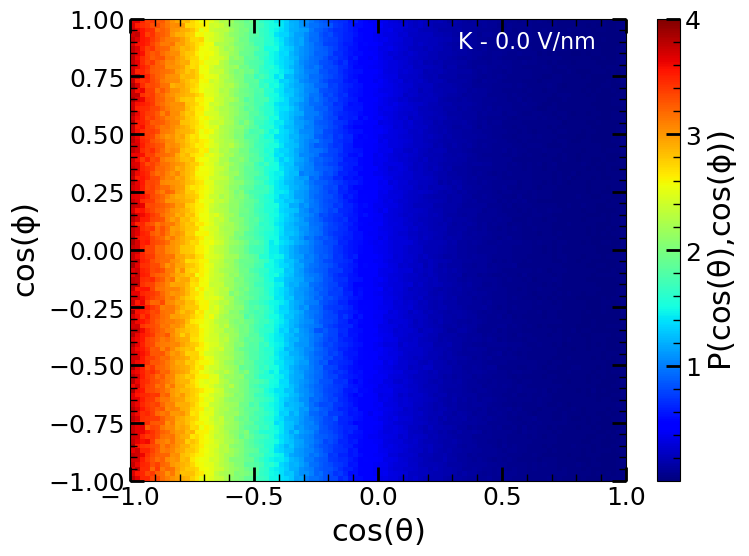

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1K/run_100ns_1.0bar_300K_0.1V_13/solvation_fieldK.xvg
15


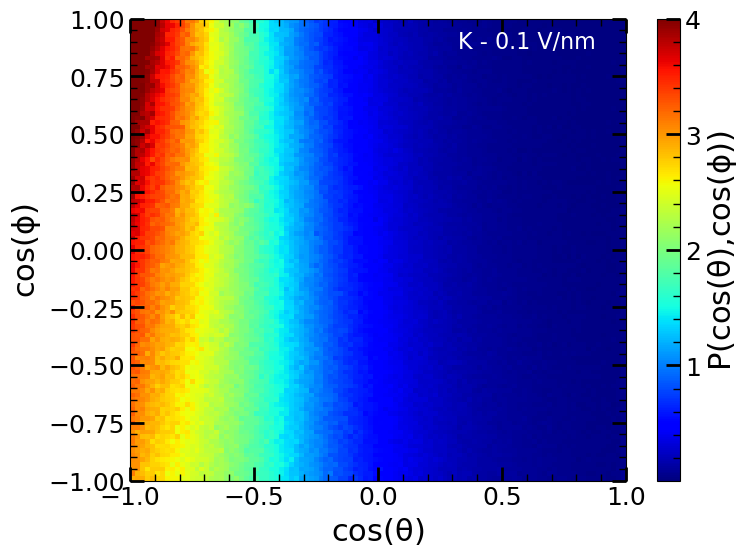

16


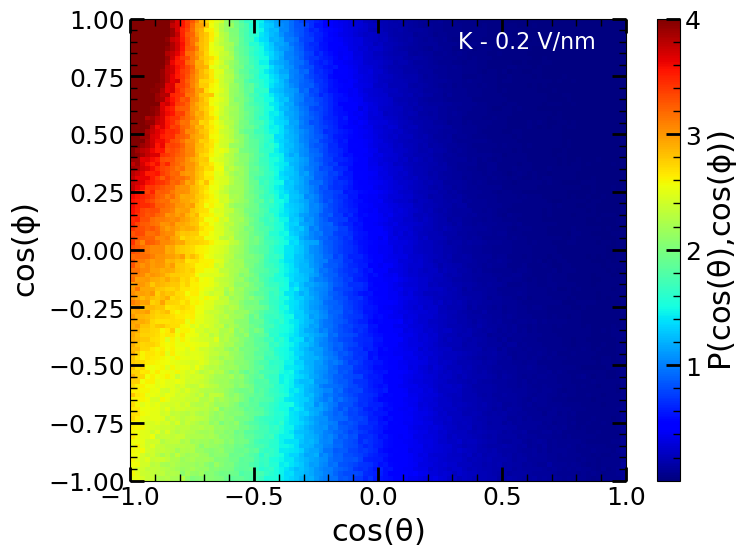

16


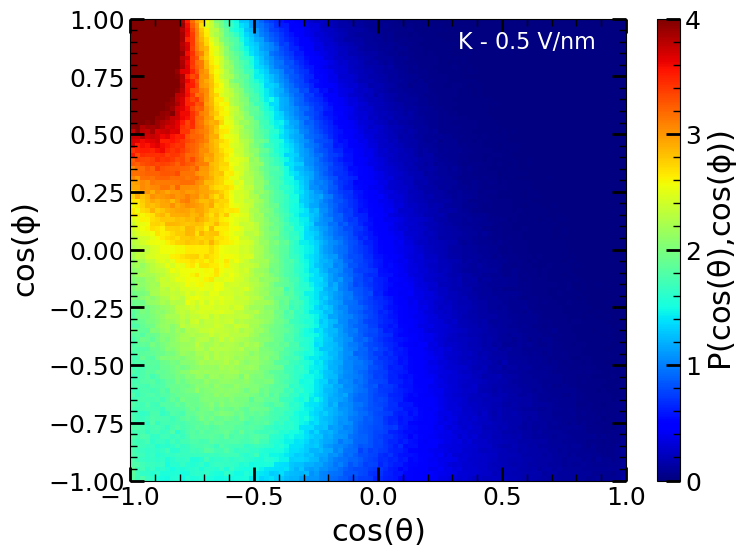

16


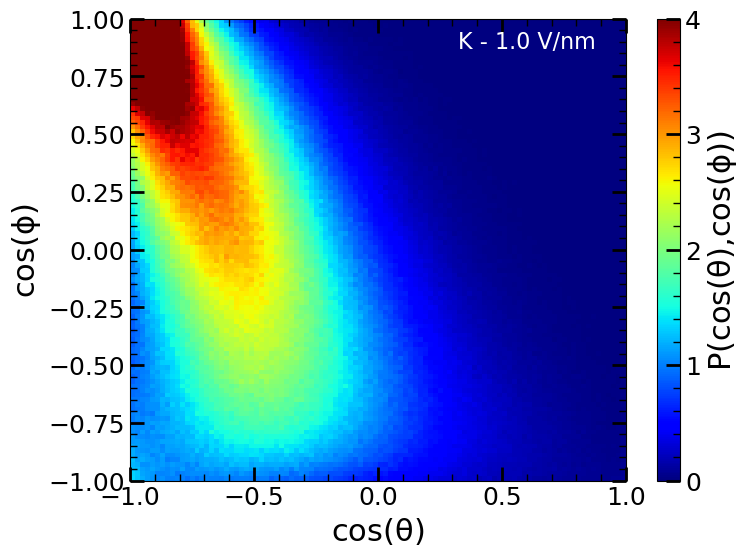

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Rb/run_100ns_1.0bar_300K_0.0V_6/solvation_fieldRb.xvg
15


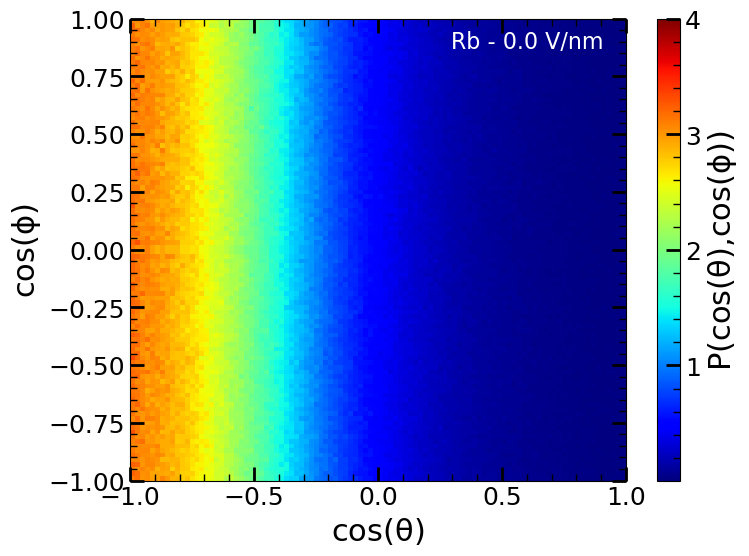

16


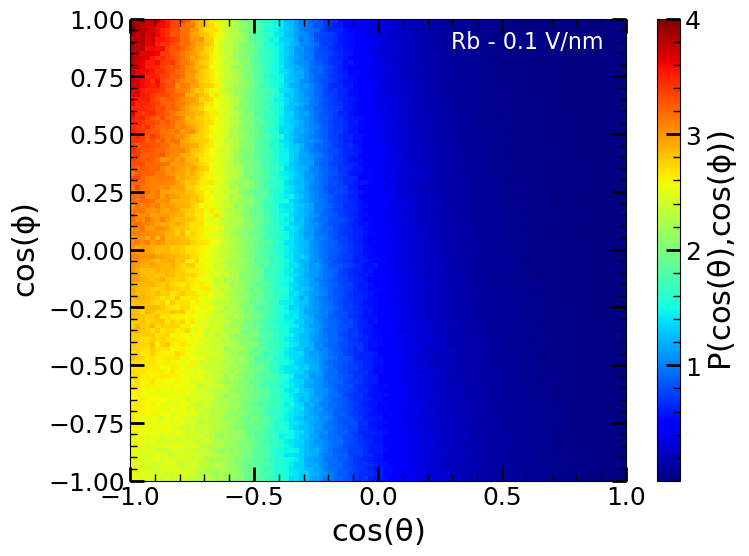

16


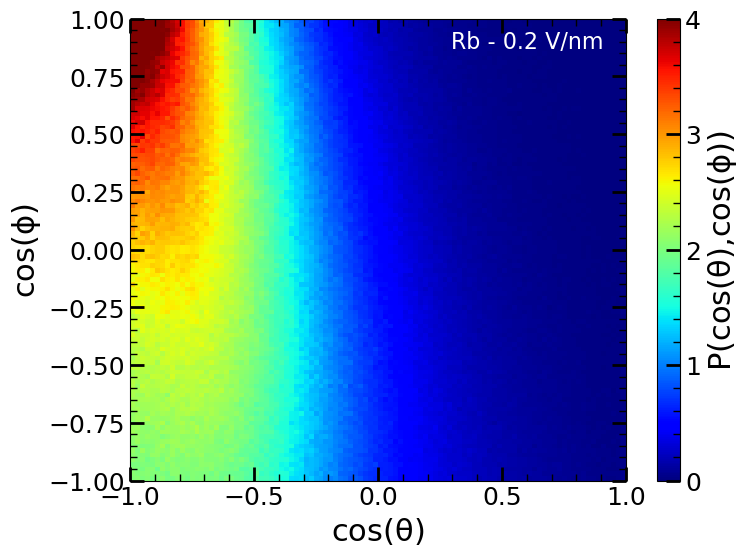

16


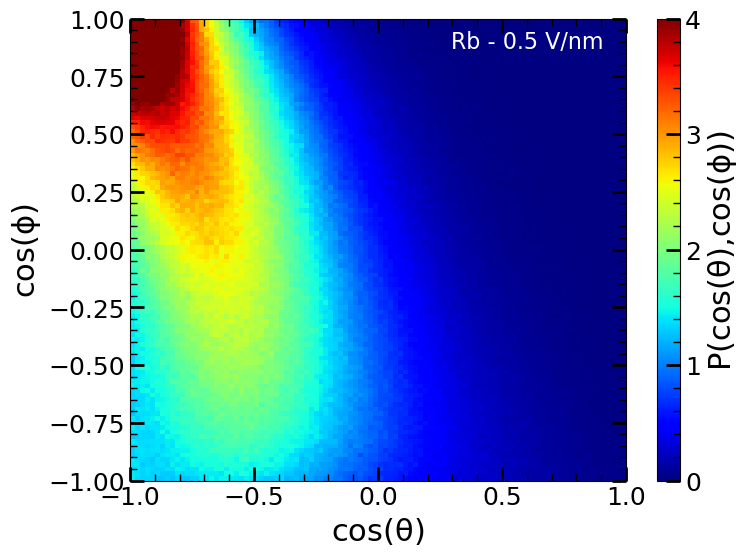

16


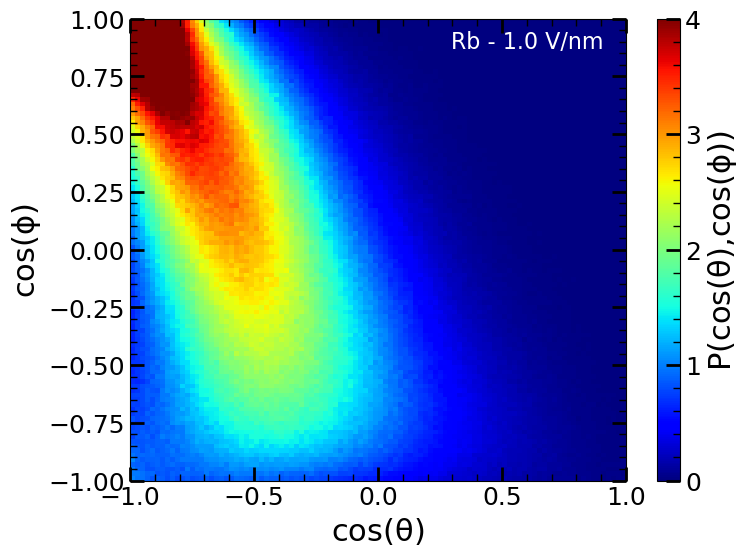

16


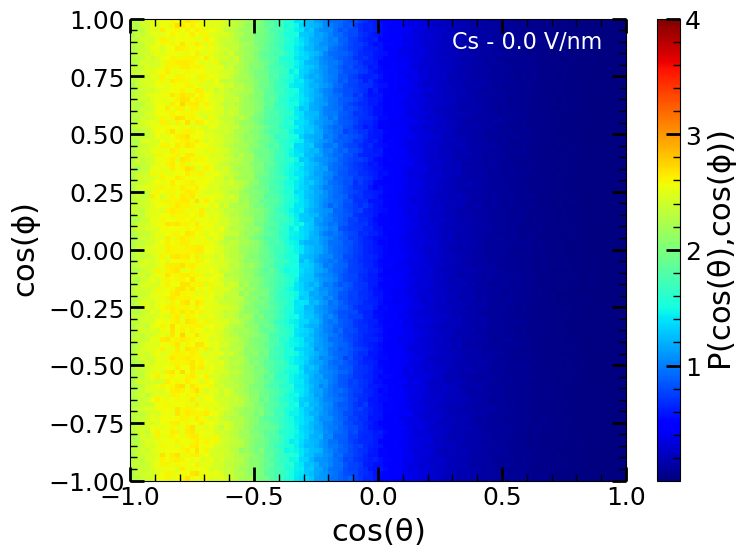

16


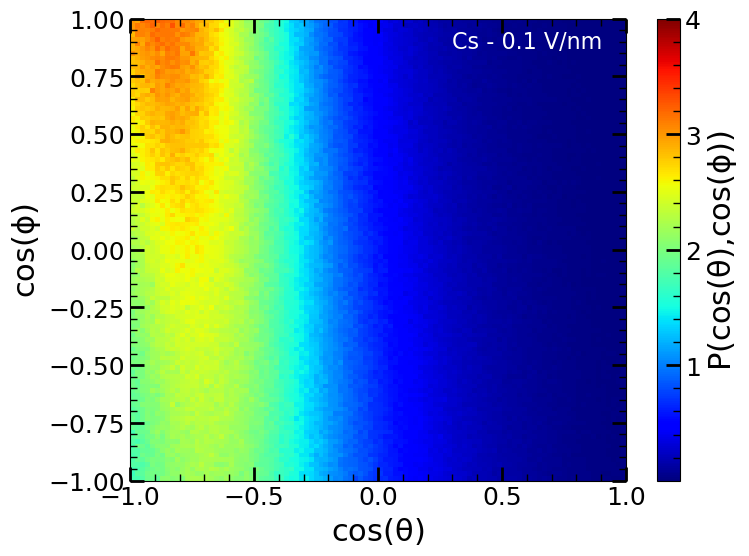

16


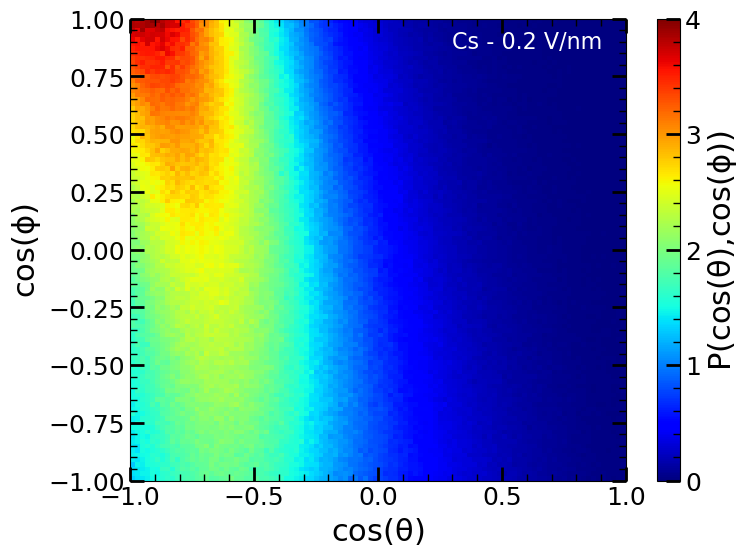

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_12/solvation_fieldCs.xvg
Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Cs/run_100ns_1.0bar_300K_0.5V_13/solvation_fieldCs.xvg
14


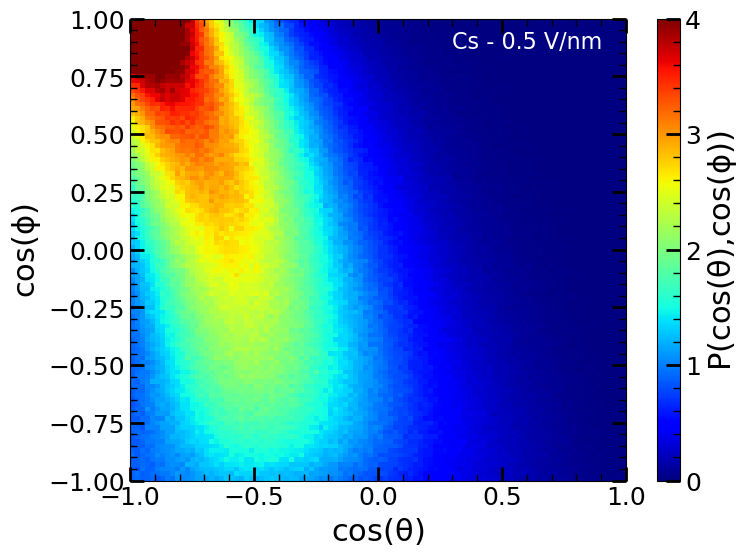

16


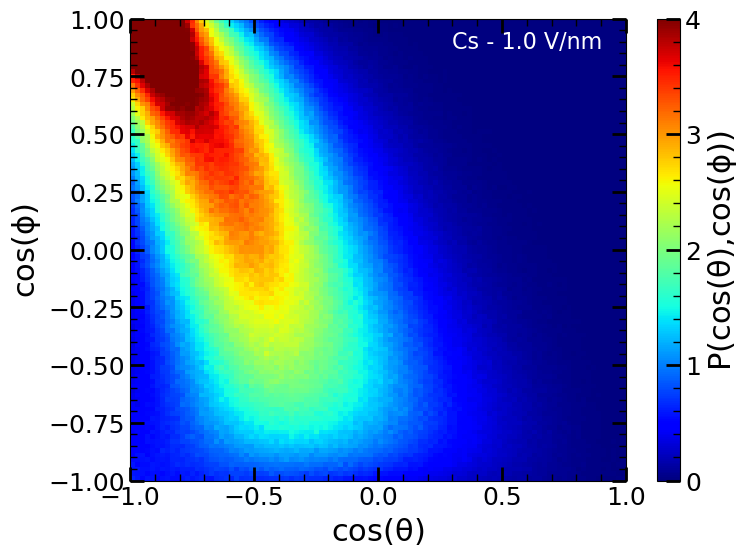

16


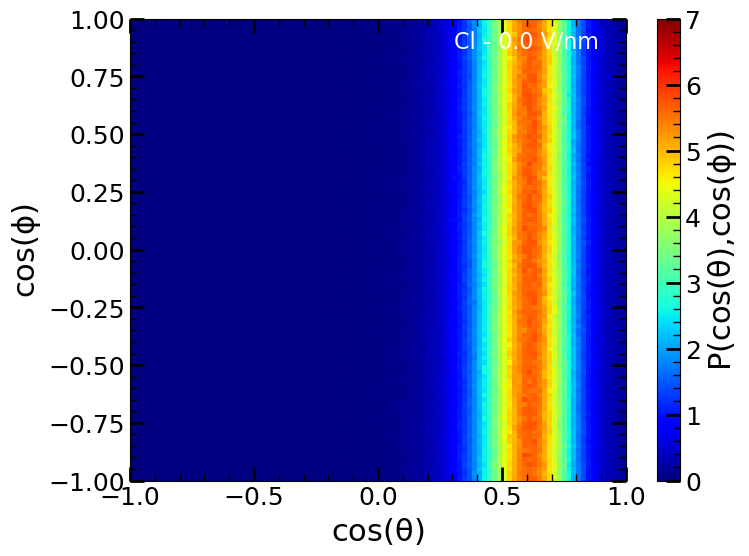

16


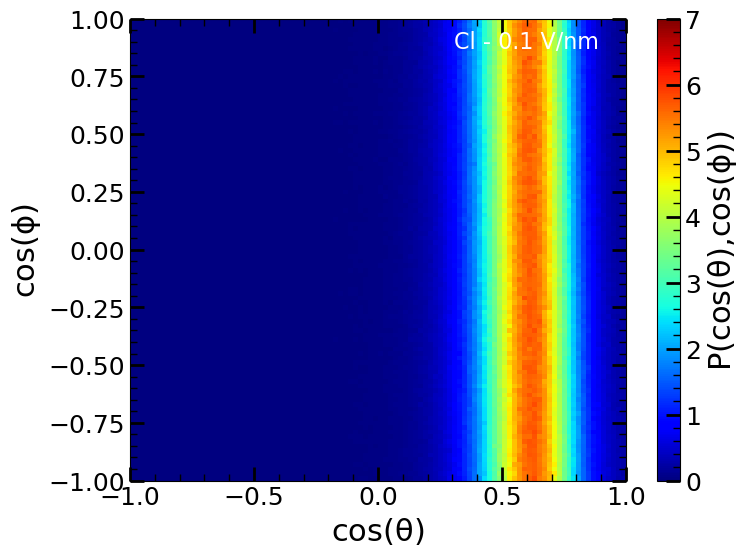

Could not open /scratch.global/tramp037/ion_hydration/simulations/SPCE-Dang/555SOL_1Cl_1Na/run_100ns_1.0bar_300K_0.2V_6/solvation_fieldCl.xvg
15


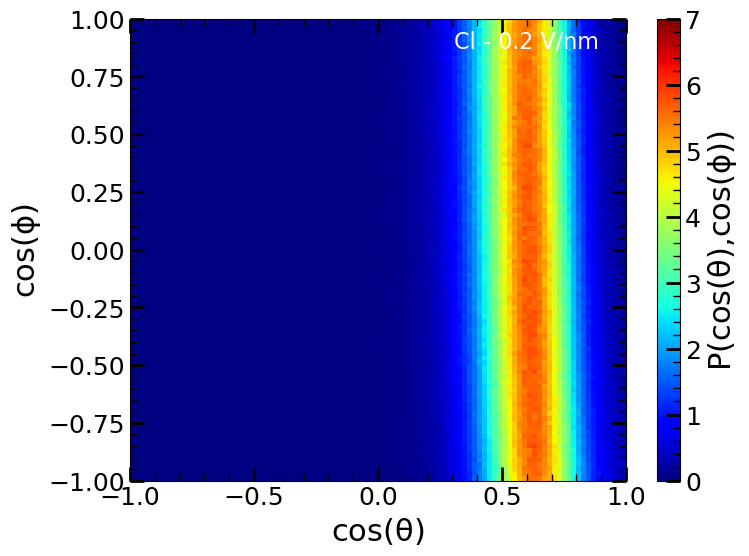

16


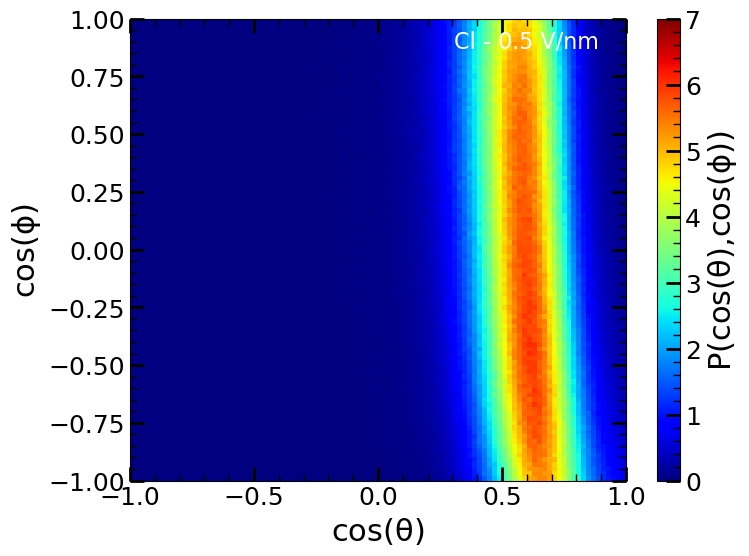

16


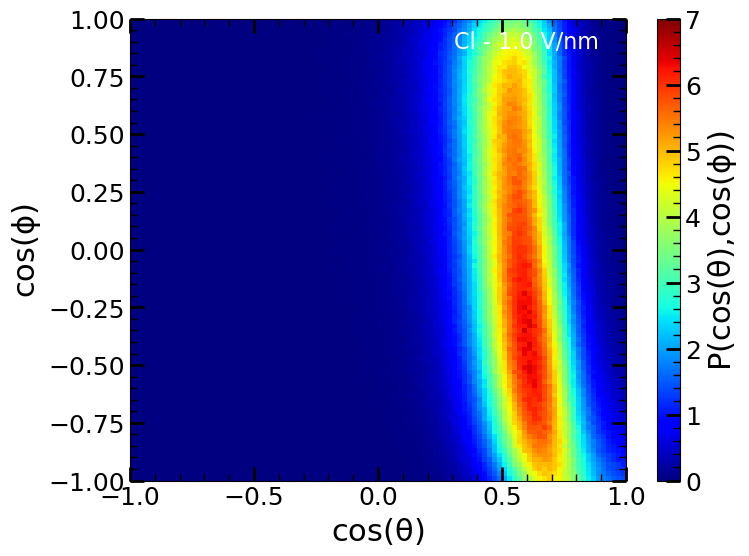

In [8]:
plt.style.use('rcParams.mplstyle')
# cation='Li'
# anion='Cl'
# ion = cation

for ion in catl+anl:
    if ion == anl[0]:
        cation = catl[1]
        anion = ion
    else:
        cation = ion
        anion = anl[0]
    for efield in efields:
        num_success = 0
        cnt_total = 0
        for n in range(1,17):
            simpath = mpath+f"{nsol}SOL_{nan}{anion}_{ncat}{cation}/run_{simtime}ns_{pressure:.1f}bar_{temp}K_{efield:.1f}V_{n}/"
            xvg_file = f'{simpath}solvation_field{ion}.xvg'

            try:
                with open(xvg_file, 'r') as f:
                    centers_x = []
                    centers_y = []
                    count = 0
                    for line in f:
                        # skip lines starting with # and @
                        if line.startswith(('#', '@')):
                            continue
                        else:
                            # obtain the x values (first column) and y values for specified columns
                            values = line.split()
                            if count == 0:
                                bins = [int(v) for v in values]
                                cnt = np.zeros((bins[0],bins[1]))
                            elif count == 1:
                                centers_y = [float(v) for v in values]
                            elif count < bins[1]+2:
                                centers_x.append(float(values[0]))
                                for i in range(bins[0]):
                                    cnt[count-2,i] = float(values[i+1])

                            count += 1
                num_success += 1  
                if num_success == 1:
                    cnt_total = cnt
                else:
                    cnt_total += cnt 
            except:
                print(f"Could not open {xvg_file}")
                continue

        print(num_success)
        if num_success > 0:
            cnt_total /= num_success
            # plot histograms with borders
            plt.figure(figsize=(8,6))
            # plt.pcolormesh(x,y,cnt, edgecolors='k', linewidth=0.5)
            # use the jet colorbar
            # use upper limit of 0.8
            if ion == "Li":
                vm = 20
            elif ion == "Na":
                vm = 10
            elif ion == "K":
                vm = 4
            elif ion == "Rb":
                vm = 4
            elif ion == "Cs":
                vm = 4
            elif ion == "Cl":
                vm = 7

            # correct for rounding to 0
            centersum = cnt_total[:,49] + cnt_total[:,50]
            cnt_total[:,49] = centersum / 2
            cnt_total[:,50] = centersum / 2
            plt.pcolormesh(centers_y,centers_x,4*cnt_total.T, cmap='jet', vmax=vm)
            # plt.contour(centers_y,centers_x,4*cnt_total.T, np.linspace(0, vm, 20), cmap='jet', vmin=0, vmax=vm)
            plt.colorbar(label=r'P(cos($\mathrm{\theta}$),cos($\mathrm{\phi}$))', ticks=np.linspace(0, vm, int(vm/(2**int(vm/10))+1)))
            # plt.xlim(-7,7)
            # plt.ylim(-200,200)
            # plt.xlim(-25,25)
            # set y axis labels
            # plt.yticks([-180,-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
            # plt.gca().set_aspect('equal', adjustable='box')
            # plt.xlabel('z ($\mathrm{\AA}$)')
            plt.xlabel(r'cos($\mathrm{\theta}$)')
            plt.ylabel(r'cos($\mathrm{\phi}$)')
            # put a label within the plot for the cation and the efield
            plt.text(0.8, 0.95, f'{ion} - {efield} V/nm', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
            # plt.title('Coordination Map: '+ion_to_study)
            plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2034236/2252269529.py:74: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
/tmp/ipykernel_2034236/2252269529.py:75: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Distance ($\mathrm{\AA}$)')
/tmp/ipykernel_2034236/2252269529.py:76: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$(\mathrm{cos(\phi)})$')


16
0.5667625244620658


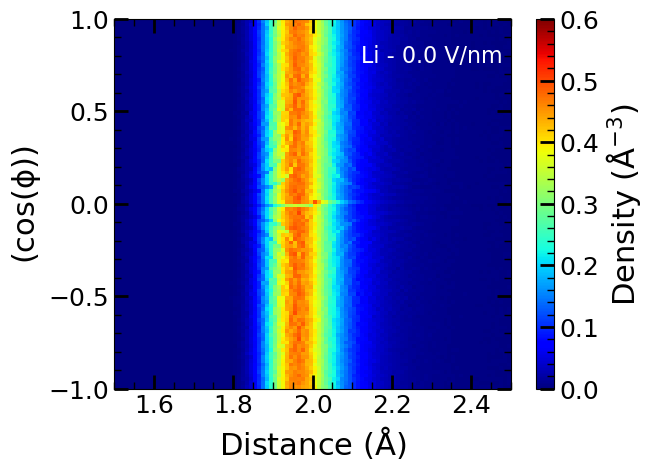

16
0.5605796605588432


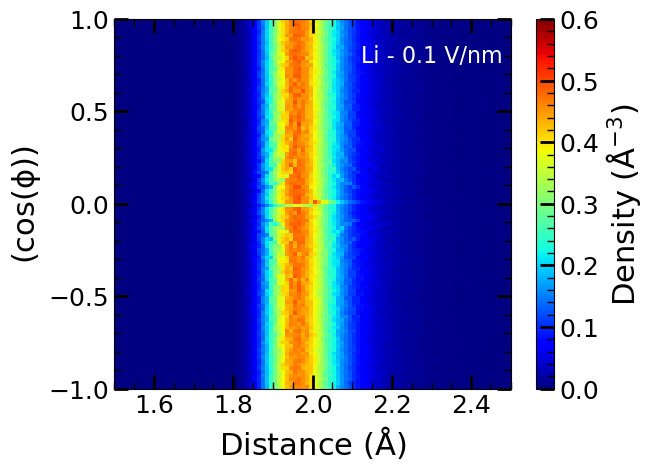

16
0.5708844337308808


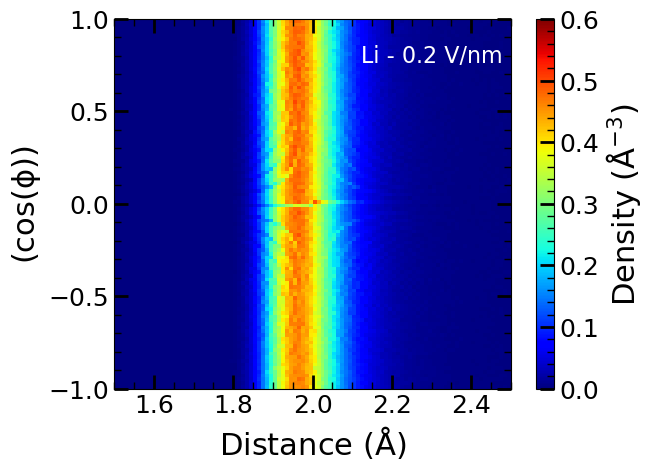

16
0.5889959957709574


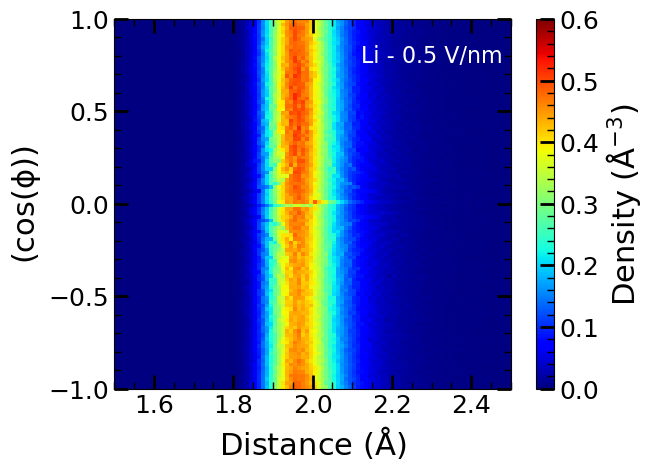

16
0.5933963471971375


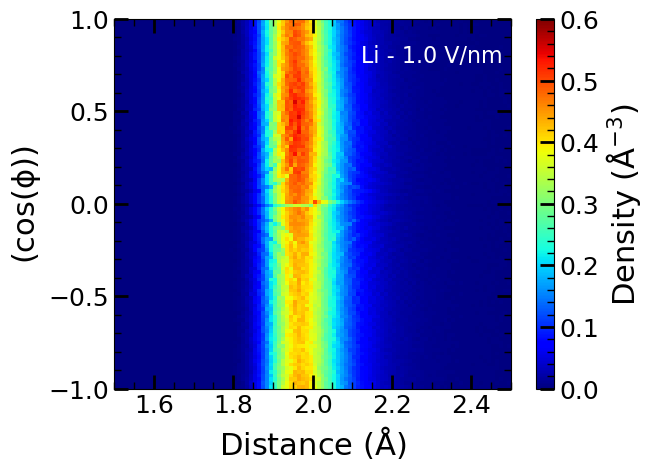

16
0.29099900225192693


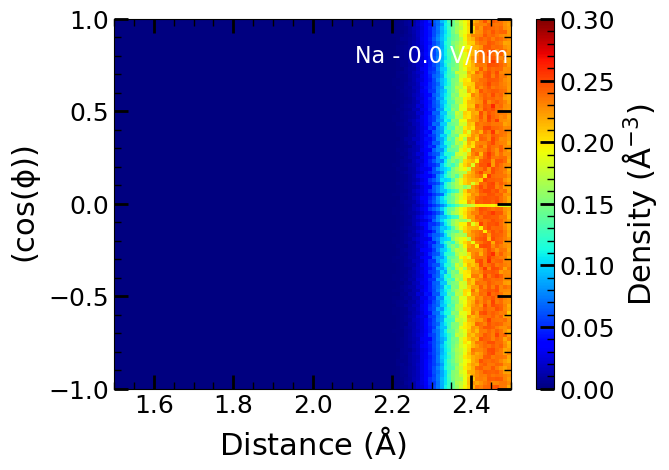

16
0.30104105863458674


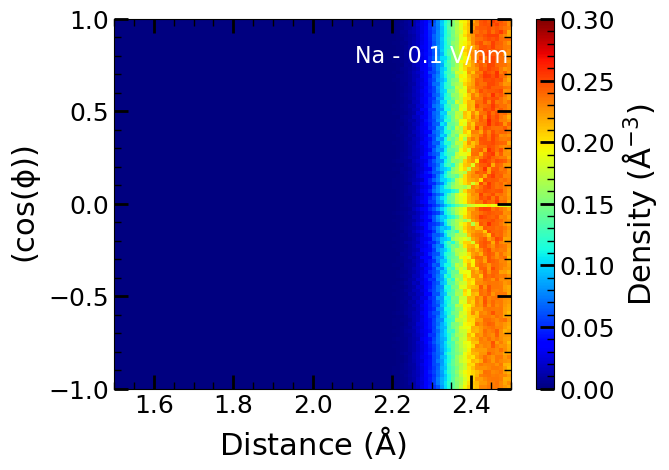

16
0.31016448476759184


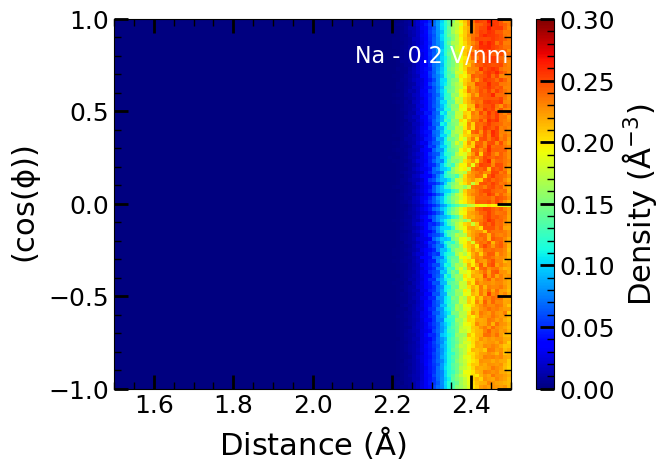

16
0.3102835472768767


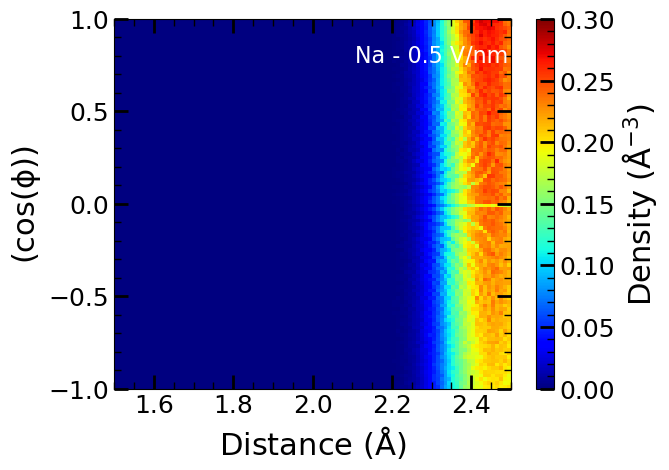

16
0.3233761113275674


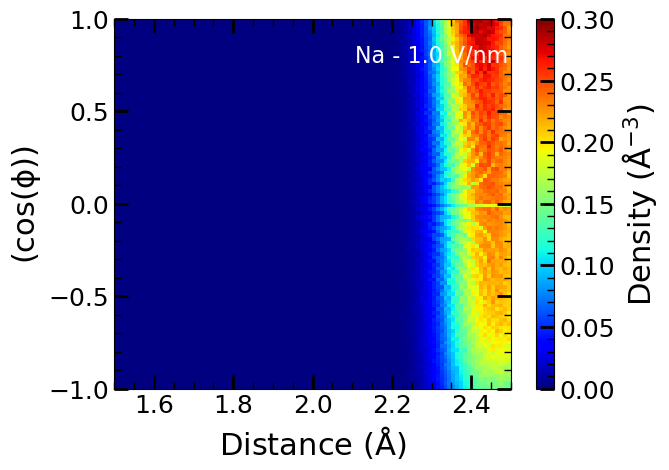

16
0.1857842751028927


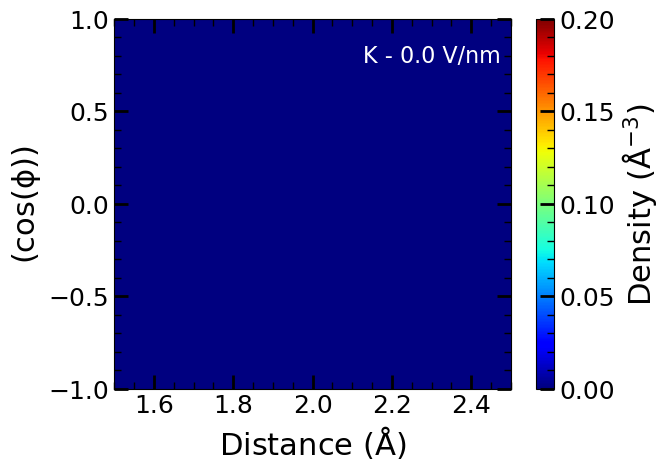

16
0.19109319037344136


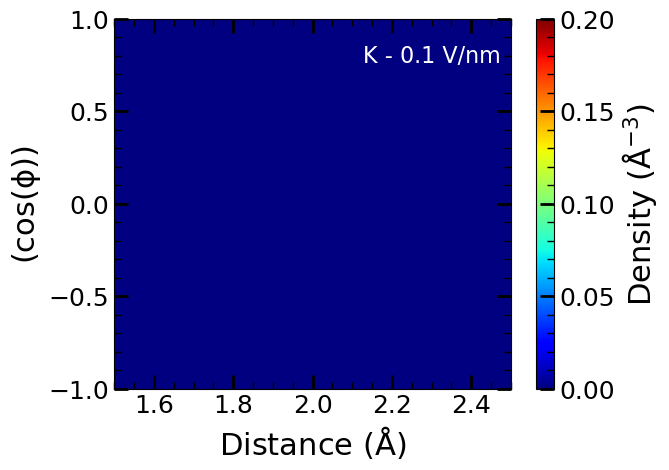

16
0.19216836217993738


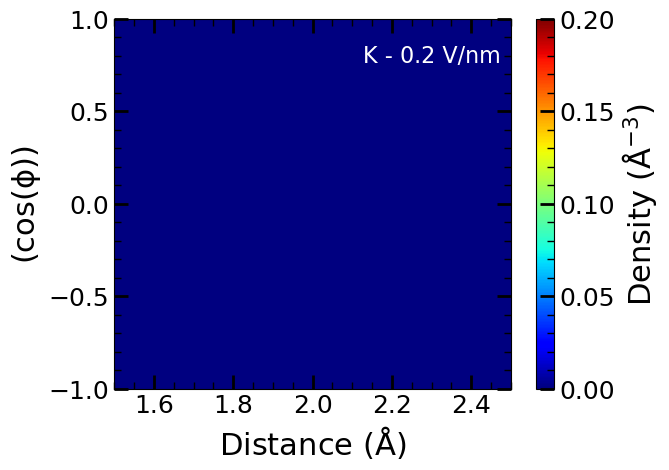

16
0.2018521043009807


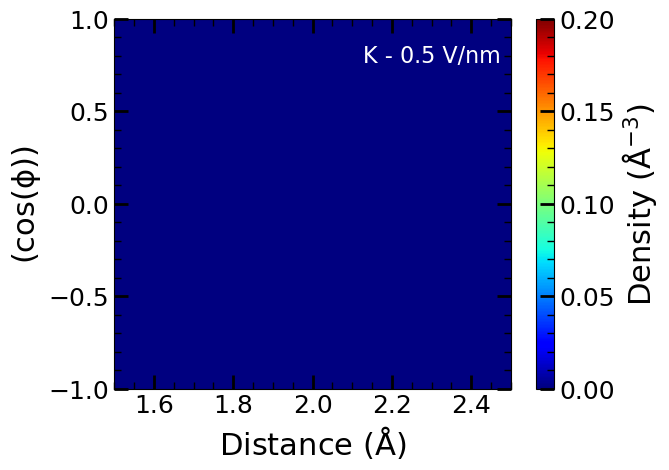

16
0.21184679358451217


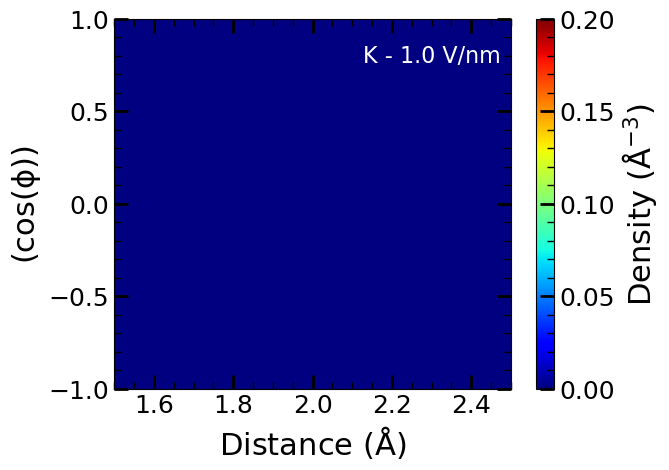

16
0.17231963174445086


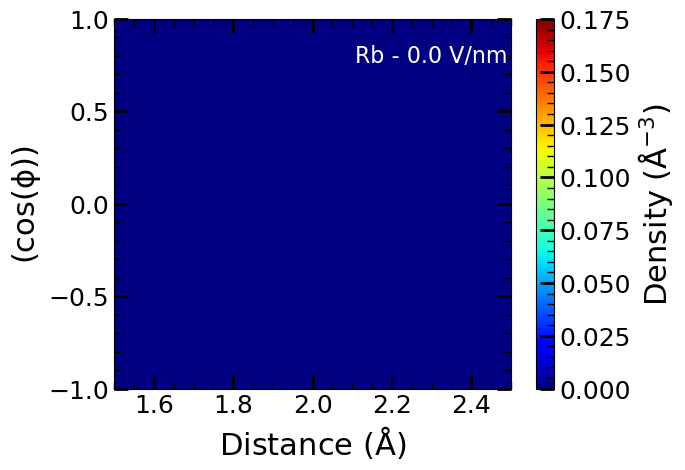

16
0.1660741499876636


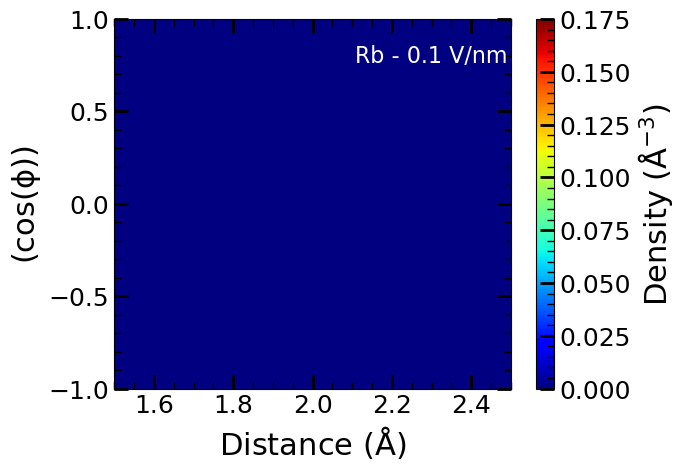

16
0.17708459087082362


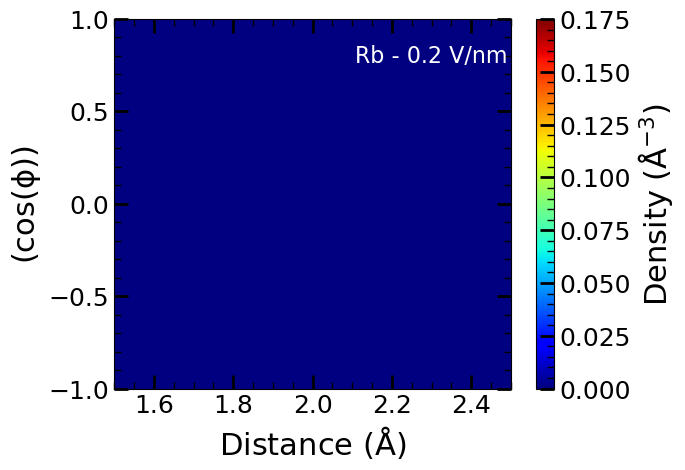

16
0.18482377993225185


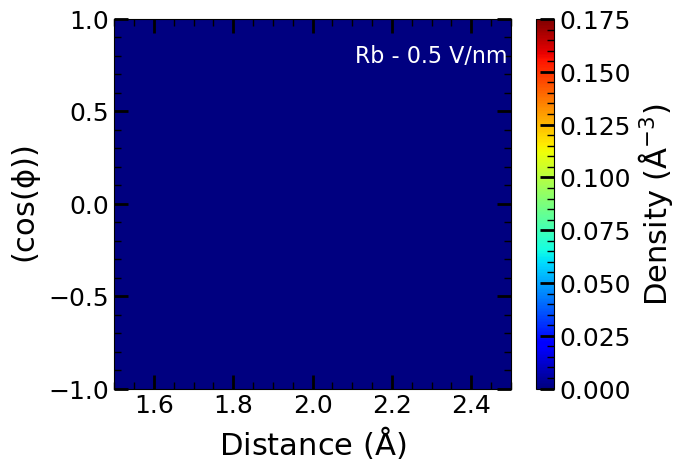

16
0.18226472920823752


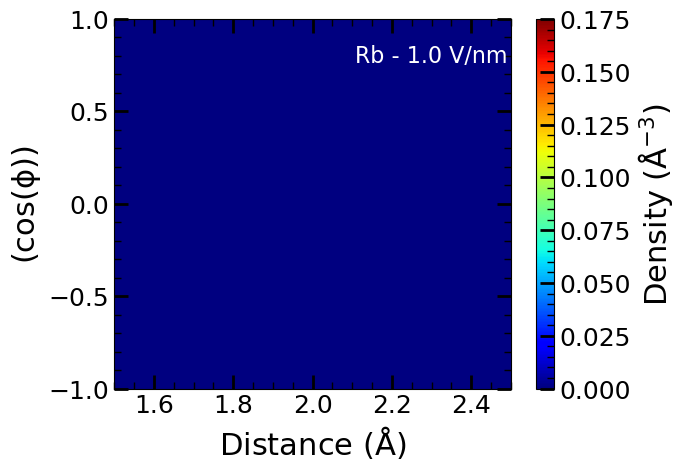

16
0.13934461031570963


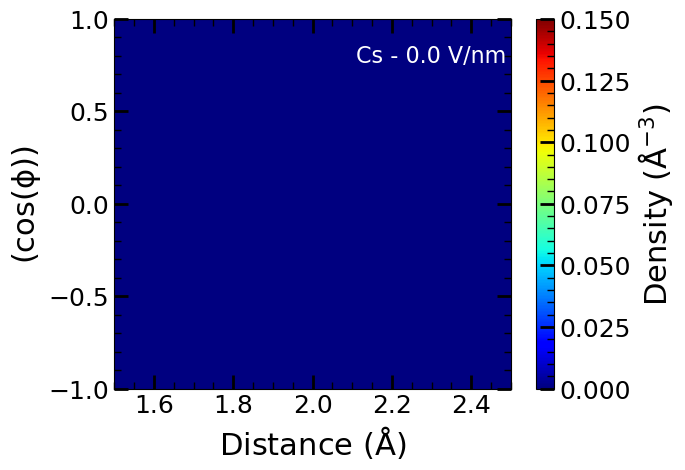

16
0.14150397979879725


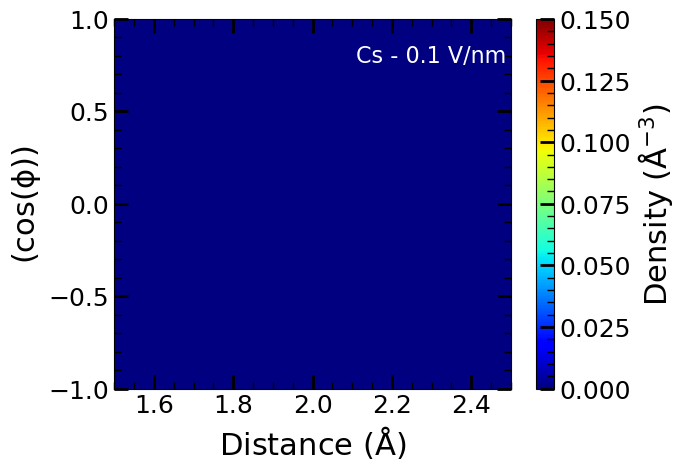

16
0.14727936555466792


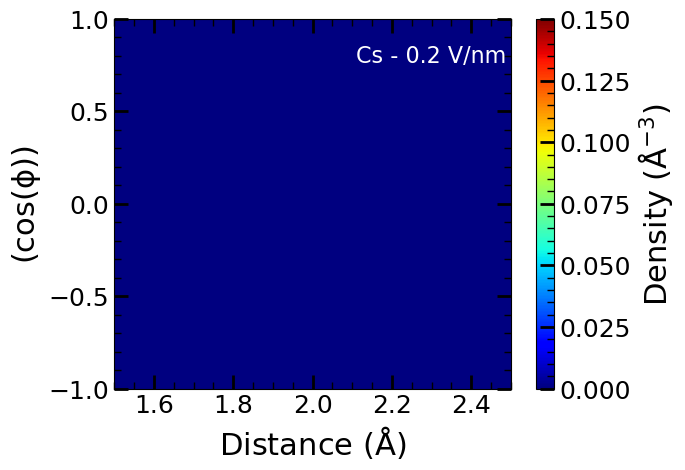

16
0.16238398469651072


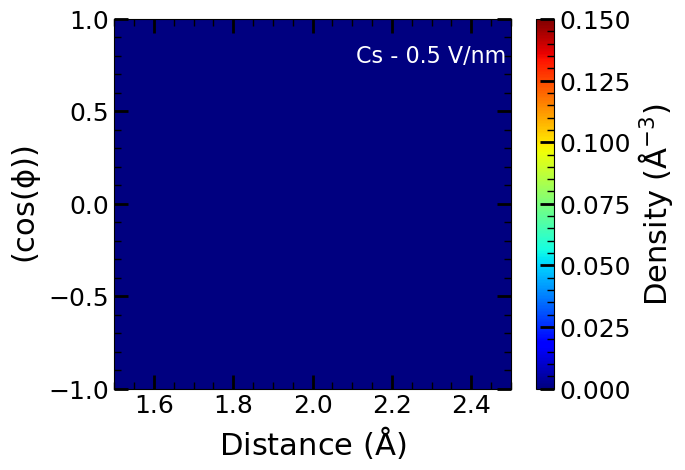

16
0.15603526100272372


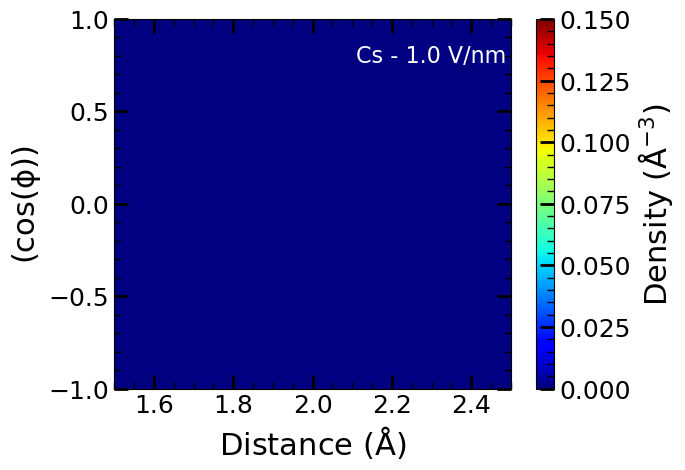

In [4]:
plt.style.use('rcParams.mplstyle')

for cation in catl: 
    for efield in efields:
        num_success = 0
        cnt_total = 0

        for n in range(1,17):
            xvg_file = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/{nsol}SOL_{nan}{anl[0]}_{ncat}{cation}/run_{simtime}ns_{pressure}bar_{temp}K_{efield}V_{n}/2d_radialdensity-{cation}-OW.xvg"
            try:
                with open(xvg_file, 'r') as f:
                    centers_t = []
                    centers_r = []
                    count = 0
                    for line in f:
                        # skip lines starting with # and @
                        if line.startswith(('#', '@')):
                            continue
                        else:
                            # obtain the x values (first column) and y values for specified columns
                            values = line.split()
                            if count == 0:
                                bins = [int(v) for v in values]
                                cnt = np.zeros((bins[0],bins[1]))
                            elif count == 1:
                                centers_r = [float(v) for v in values]
                            elif count < bins[1]+2:
                                centers_t.append(float(values[0]))
                                for i in range(bins[0]):
                                    cnt[i,count-2] = float(values[i+1])


                            # x.append(float(values[0]))
                            # for i, c in enumerate(columns):
                            #     # do not add for columns without a name
                            #     if c == '':
                            #         continue
                            #     # print(values,i,path_to_file)
                            #     if values[i+1] == 'nan':
                            #         y[c].append(np.nan)
                            #     y[c].append(float(values[i+1]))
                            count += 1
                num_success += 1
                if num_success == 1:
                    cnt_total = cnt
                else:
                    cnt_total += cnt
            except:
                print(f"Could not open {xvg_file}")
                continue

        if num_success > 0:
            print(num_success)
            cnt_total /= num_success
            # 2D histogram plot of cnt
            plt.figure()
            # plot with borders around each bin
            plt.text(0.8, 0.9, f'{cation} - {efield} V/nm', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
            if cation == "Li":
                vm = 0.6
            elif cation == "Na":
                vm = 0.3
            elif cation == "K":
                vm = 0.2
            elif cation == "Rb":
                vm = 0.175
            elif cation == "Cs":
                vm = 0.15
            print(np.max(cnt))
            plt.pcolormesh(centers_r,centers_t,cnt_total.T, cmap='jet', vmax=vm)
            plt.xlim(1.5,2.5)
            # plt.ylim()
            # flip the colorbar
            plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
            plt.xlabel('Distance ($\mathrm{\AA}$)')
            plt.ylabel('$(\mathrm{cos(\phi)})$')
            plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:76: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2034236/2268132983.py:74: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
/tmp/ipykernel_2034236/2268132983.py:75: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Distance ($\mathrm{\AA}$)')
/tmp/ipykernel_2034236/2268132983.py:76: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$(\mathrm{cos(\phi)})$')


16
0.3414167122856978


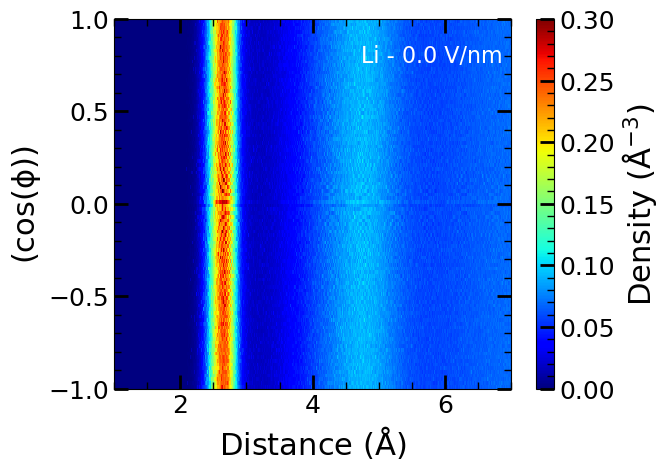

16
0.3207685029136258


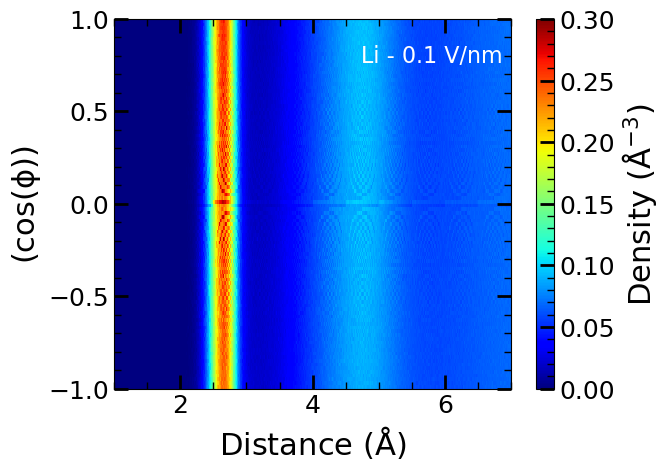

16
0.318212974153607


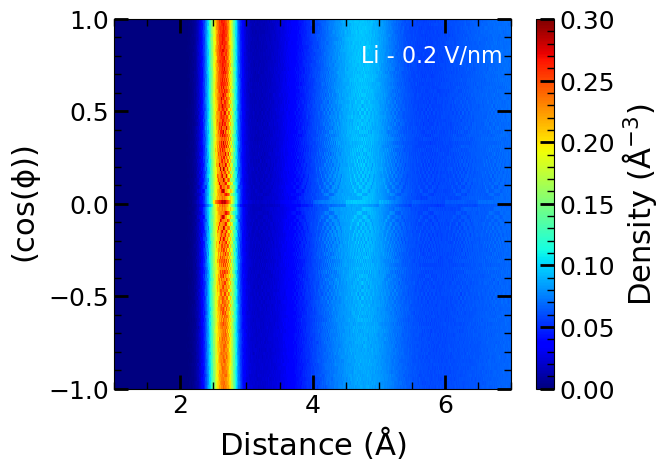

16
0.3243539223416443


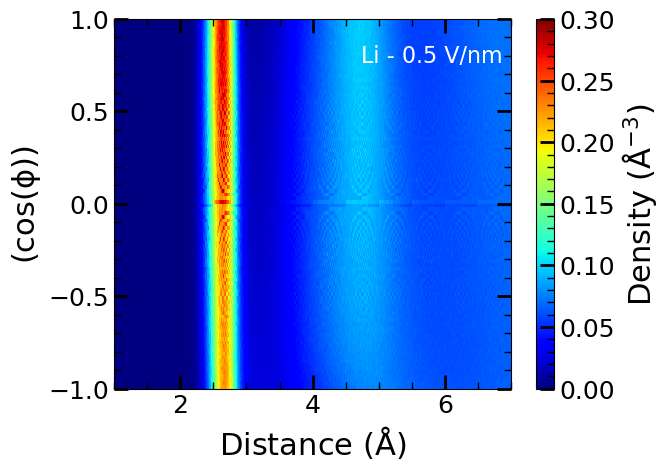

16
0.3286865436610485


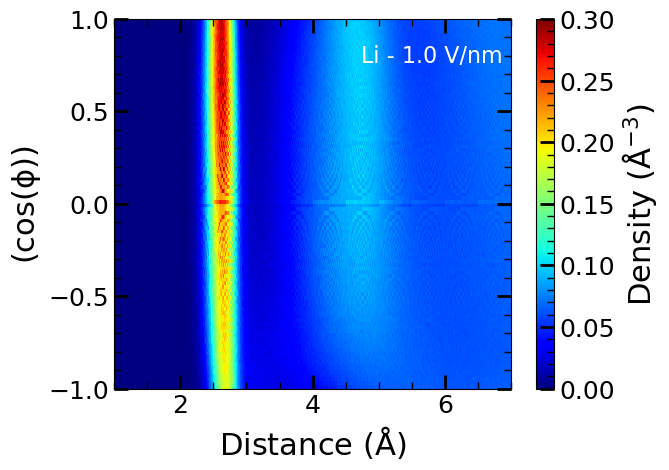

16
0.24514742952796484


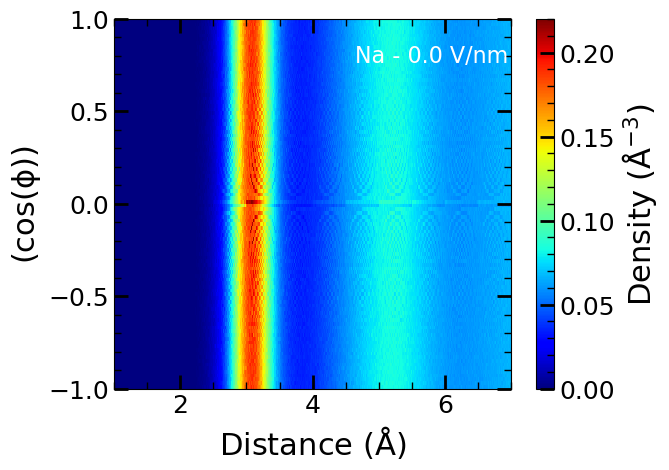

16
0.23945488315779245


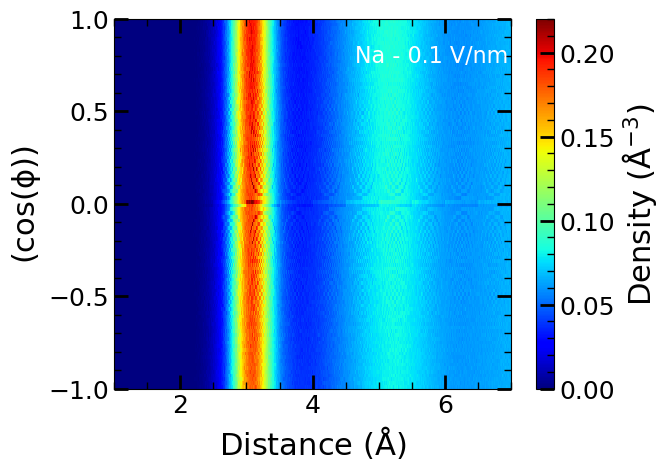

16
0.23396379213827245


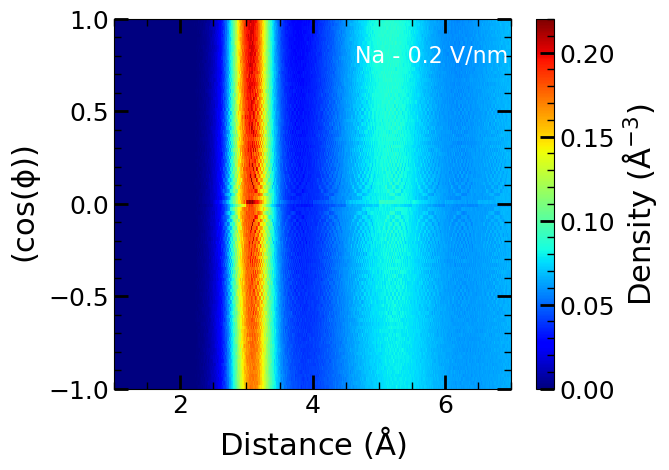

16
0.25667038644883095


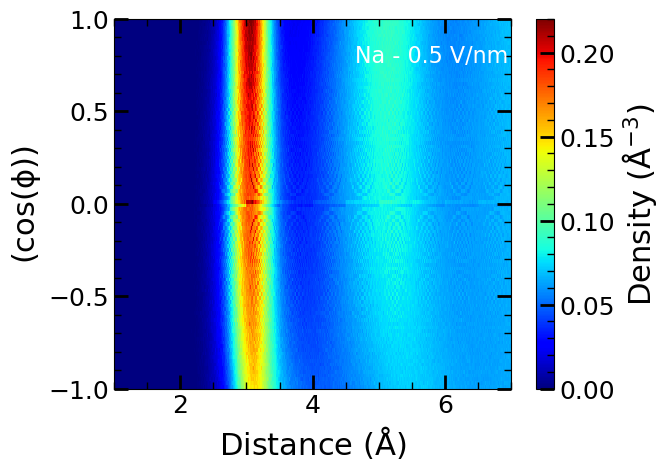

16
0.25328199850891236


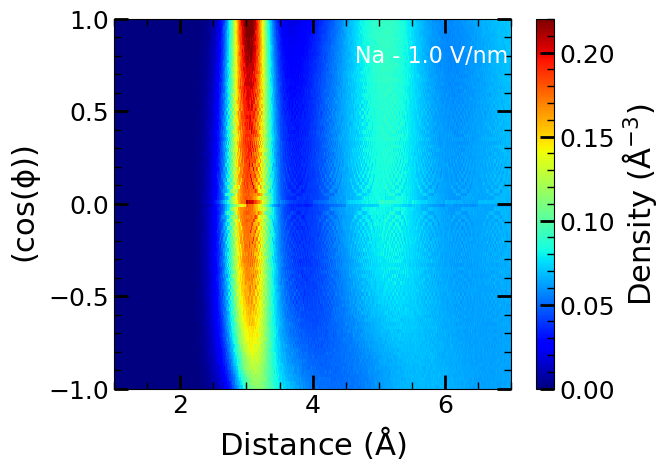

16
0.17914324701012405


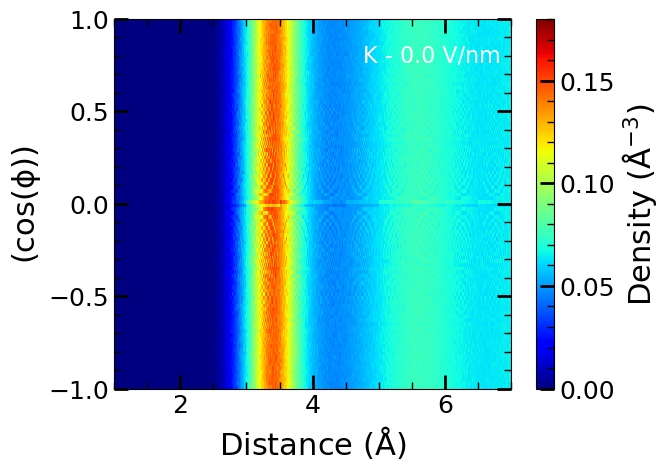

16
0.17958753876905165


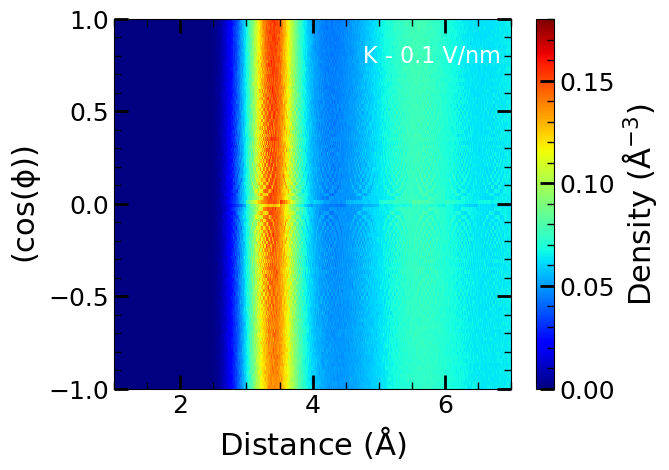

16
0.18142326121244692


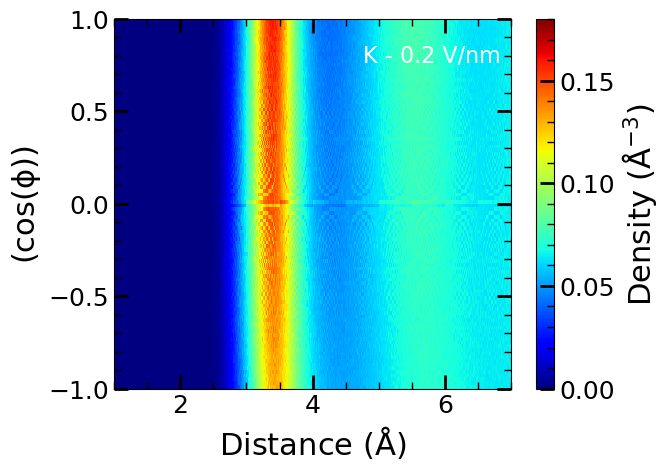

16
0.20399966691893762


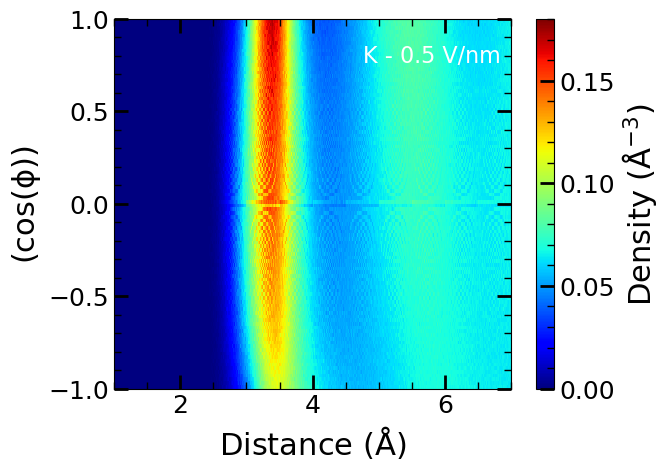

16
0.2014902187744442


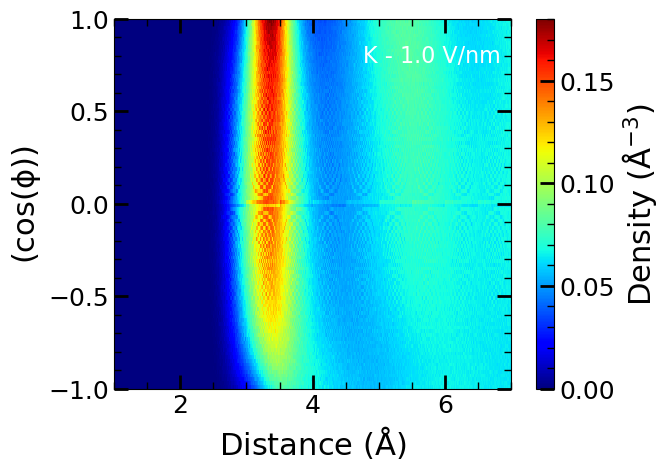

16
0.17206398710896267


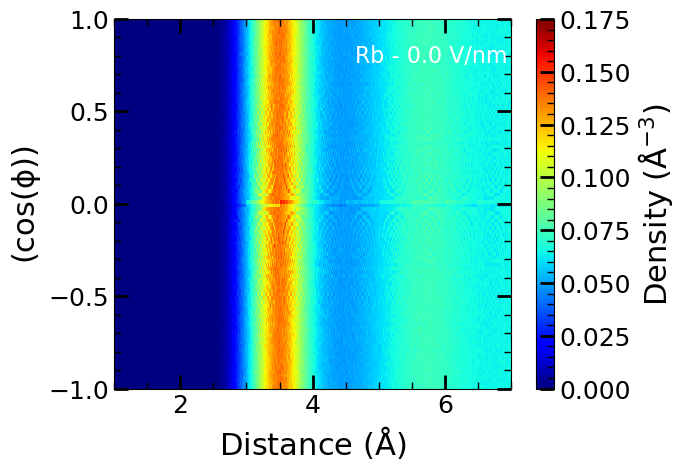

16
0.1681226565584463


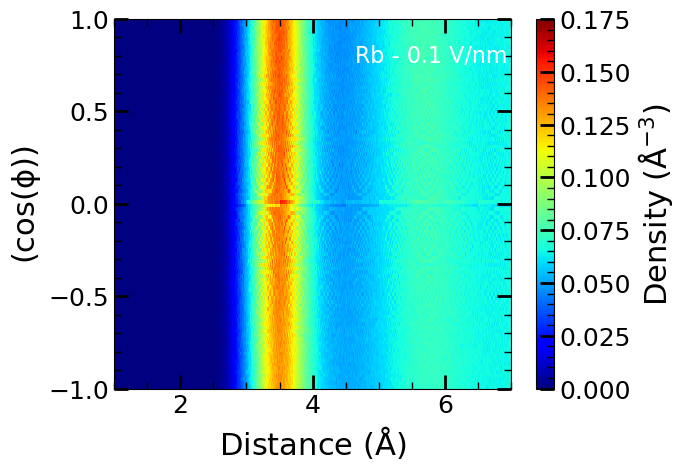

16
0.16971562154109265


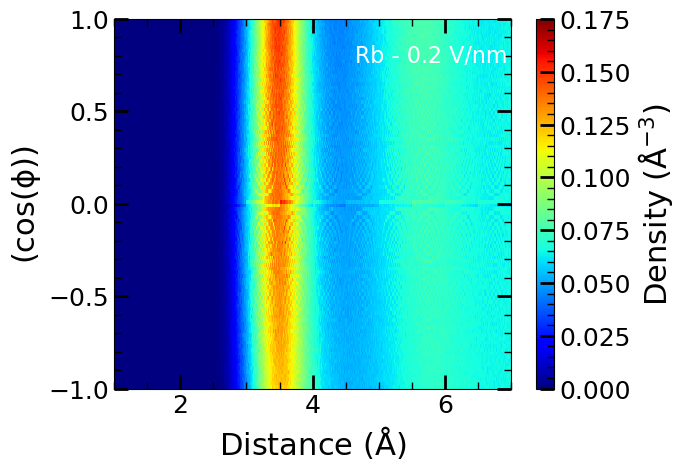

16
0.18451963749601358


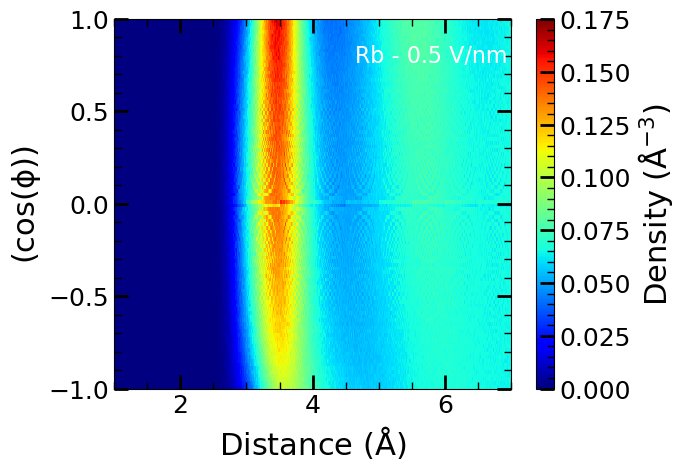

16
0.18449415120458715


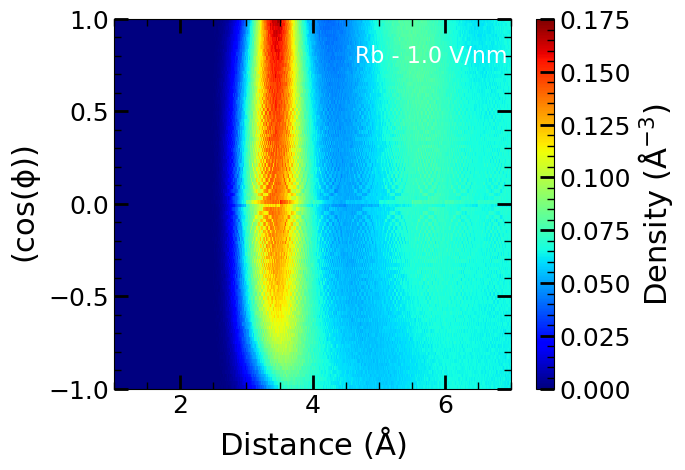

16
0.16087211953051186


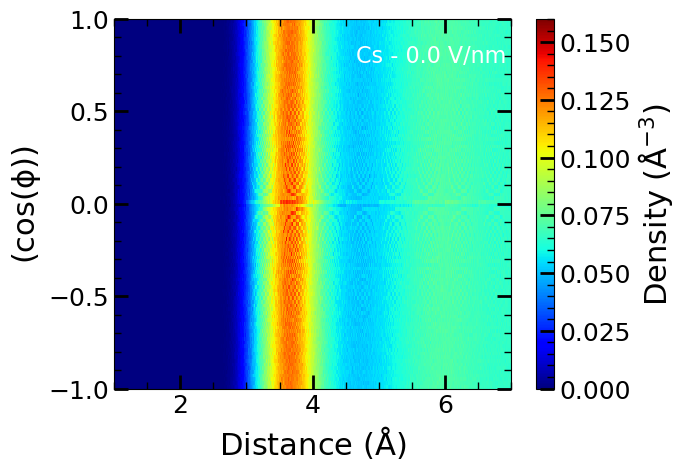

16
0.16469903230803412


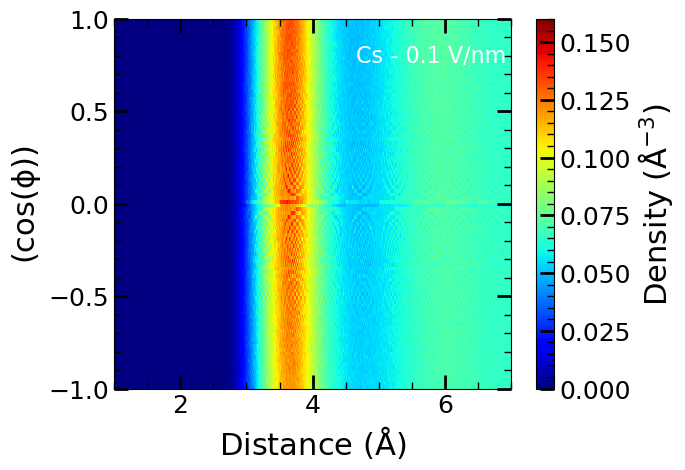

16
0.1674921215020584


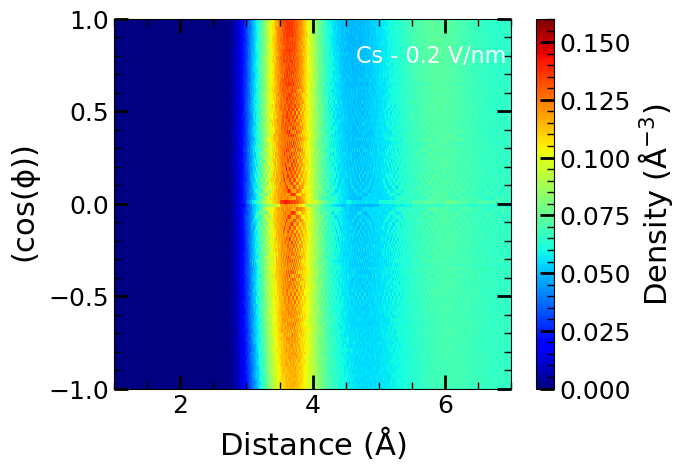

16
0.16936006337754603


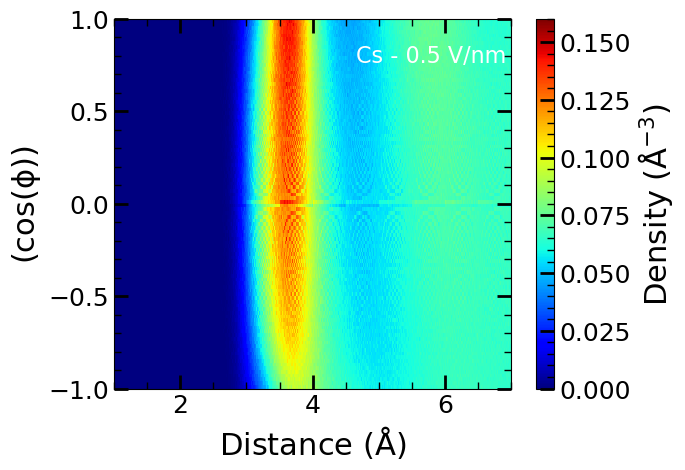

16
0.1683921102390366


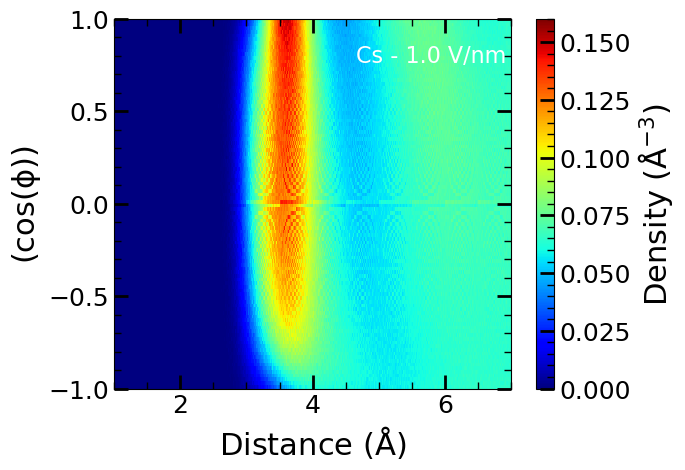

In [3]:
plt.style.use('rcParams.mplstyle')

for cation in catl: 
    for efield in efields:
        num_success = 0
        cnt_total = 0

        for n in range(1,17):
            xvg_file = f"/scratch.global/tramp037/ion_hydration/simulations/{watermodel}-{ionmodel}/{nsol}SOL_{nan}{anl[0]}_{ncat}{cation}/run_{simtime}ns_{pressure}bar_{temp}K_{efield}V_{n}/2d_radialdensity-{cation}-HW.xvg"
            try:
                with open(xvg_file, 'r') as f:
                    centers_t = []
                    centers_r = []
                    count = 0
                    for line in f:
                        # skip lines starting with # and @
                        if line.startswith(('#', '@')):
                            continue
                        else:
                            # obtain the x values (first column) and y values for specified columns
                            values = line.split()
                            if count == 0:
                                bins = [int(v) for v in values]
                                cnt = np.zeros((bins[0],bins[1]))
                            elif count == 1:
                                centers_r = [float(v) for v in values]
                            elif count < bins[1]+2:
                                centers_t.append(float(values[0]))
                                for i in range(bins[0]):
                                    cnt[i,count-2] = float(values[i+1])


                            # x.append(float(values[0]))
                            # for i, c in enumerate(columns):
                            #     # do not add for columns without a name
                            #     if c == '':
                            #         continue
                            #     # print(values,i,path_to_file)
                            #     if values[i+1] == 'nan':
                            #         y[c].append(np.nan)
                            #     y[c].append(float(values[i+1]))
                            count += 1
                num_success += 1
                if num_success == 1:
                    cnt_total = cnt
                else:
                    cnt_total += cnt
            except:
                print(f"Could not open {xvg_file}")
                continue

        if num_success > 0:
            print(num_success)
            cnt_total /= num_success
            # 2D histogram plot of cnt
            plt.figure()
            # plot with borders around each bin
            plt.text(0.8, 0.9, f'{cation} - {efield} V/nm', horizontalalignment='center', verticalalignment='center', transform = plt.gca().transAxes, fontsize=16, color='white')
            if cation == "Li":
                vm = 0.3
            elif cation == "Na":
                vm = 0.22
            elif cation == "K":
                vm = 0.18
            elif cation == "Rb":
                vm = 0.175
            elif cation == "Cs":
                vm = 0.16
            print(np.max(cnt))
            plt.pcolormesh(centers_r,centers_t,cnt_total.T, cmap='jet', vmax=vm)
            plt.xlim(1,7)
            # plt.ylim()
            # flip the colorbar
            plt.colorbar(label='Density ($\mathrm{\AA}^{-3}$)')
            plt.xlabel('Distance ($\mathrm{\AA}$)')
            plt.ylabel('$(\mathrm{cos(\phi)})$')
            plt.show()